# Grupo 4

- Stephano Morales Linares
- Cristian Gaston Gonzalez Torres
- Marco Antonio Enciso Siviriche

# Librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pwd

'D:\\Cursos Online\\DMC\\Python for Analitycs\\Tareas\\Tarea Final'

# 1) Lectura de datos

In [3]:
data = pd.read_csv('HRAnalytics.csv', sep=",", encoding = 'latin-1')
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [4]:
data.shape

(54808, 14)

Definimos 2 columnas, el id y el target, que en nuestro caso son las siguientes variables:

In [5]:
id_column = 'employee_id'
target = 'is_promoted'

In [6]:
data[target].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

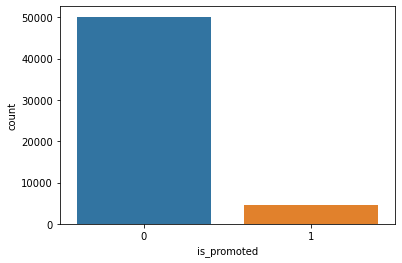

In [7]:
g = sns.countplot(data[target])
g.set_xticklabels(['0','1'])
plt.show()

Veamos algunas características de nuestra variable target:

In [8]:
data[target].value_counts(normalize = True)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

El id de la tabla **no** nos va a servir para el entrenamiento de datos, por lo que lo vamos a eliminar el id de los empleados antes de empezar con el tratamiento de datos:

In [9]:
data = data.drop(id_column, axis = 1)

In [10]:
data.head(2)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0


# 2) Tipo de variables

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [12]:
data_variables = pd.DataFrame(data.dtypes)
data_variables.rename(columns = {0: 'Tipo'}, inplace = True)
data_variables

,Tipo
department,object
region,object
education,object
gender,object
recruitment_channel,object
no_of_trainings,int64
age,int64
previous_year_rating,float64
length_of_service,int64
KPIs_met >80%,int64


# 3) Análisis exploratorio

Revisemos las columnas del conjunto de datos:

In [13]:
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [14]:
data.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [15]:
data.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


Veamos los principales estadísticos:

In [17]:
data.describe()   # sólo para variables numéricas

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [18]:
data.describe(include = 'object')   # para datos categoricos

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


Se puede observar que "región" tiene muchas categorias, lo cual se analizara para ver si es relevante.

**education**

In [19]:
data['education'].value_counts(dropna = False)

Bachelor's          36669
Master's & above    14925
NaN                  2409
Below Secondary       805
Name: education, dtype: int64

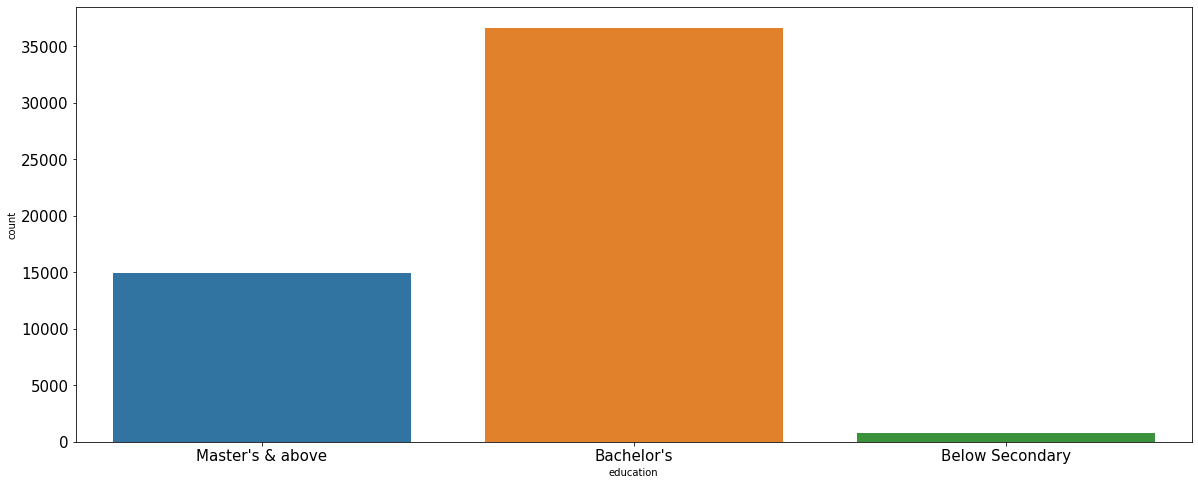

In [20]:
plt.figure(figsize=(20, 8))
sns.countplot(data = data, x = 'education')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [21]:
pd.crosstab(index = data['is_promoted'], columns = data['education'], margins = True, normalize = 'index').round(2) * 100

education,Bachelor's,Below Secondary,Master's & above
is_promoted,,,
0,70.0,2.0,28.0
1,66.0,1.0,32.0
All,70.0,2.0,28.0


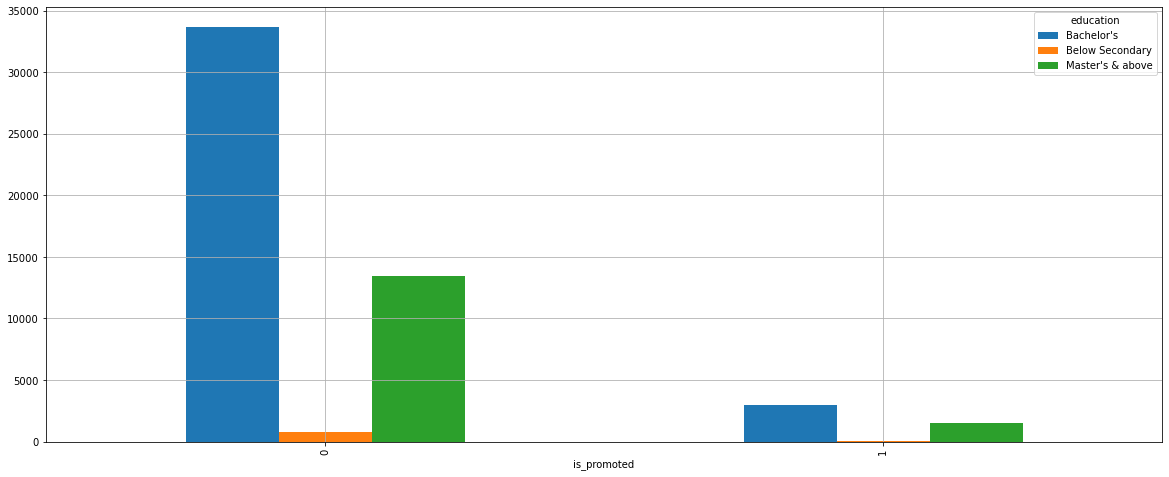

In [22]:
pd.crosstab(index = data['is_promoted'], columns = data['education']).plot.bar(figsize=(20, 8)).grid(zorder = 0)

**previous_year_rating**

In [23]:
data['previous_year_rating'].value_counts(dropna = False)

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
NaN     4124
Name: previous_year_rating, dtype: int64

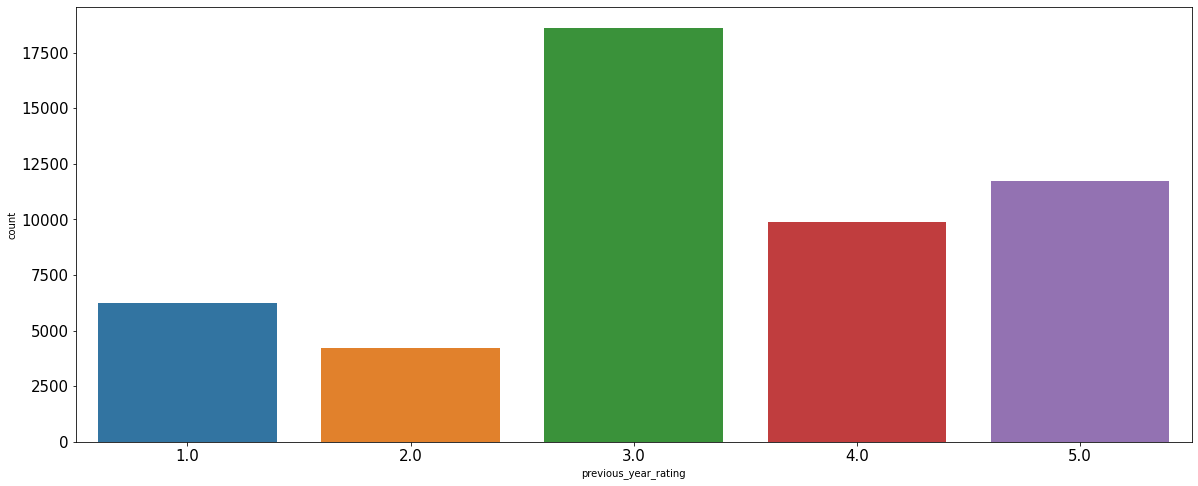

In [24]:
plt.figure(figsize=(20, 8))
sns.countplot(data = data, x = 'previous_year_rating')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [25]:
pd.crosstab(index = data['is_promoted'], columns = data['previous_year_rating'], margins = True, normalize = 'index').round(2) * 100

previous_year_rating,1.0,2.0,3.0,4.0,5.0
is_promoted,,,,,
0,13.0,9.0,37.0,20.0,21.0
1,2.0,4.0,31.0,18.0,44.0
All,12.0,8.0,37.0,19.0,23.0


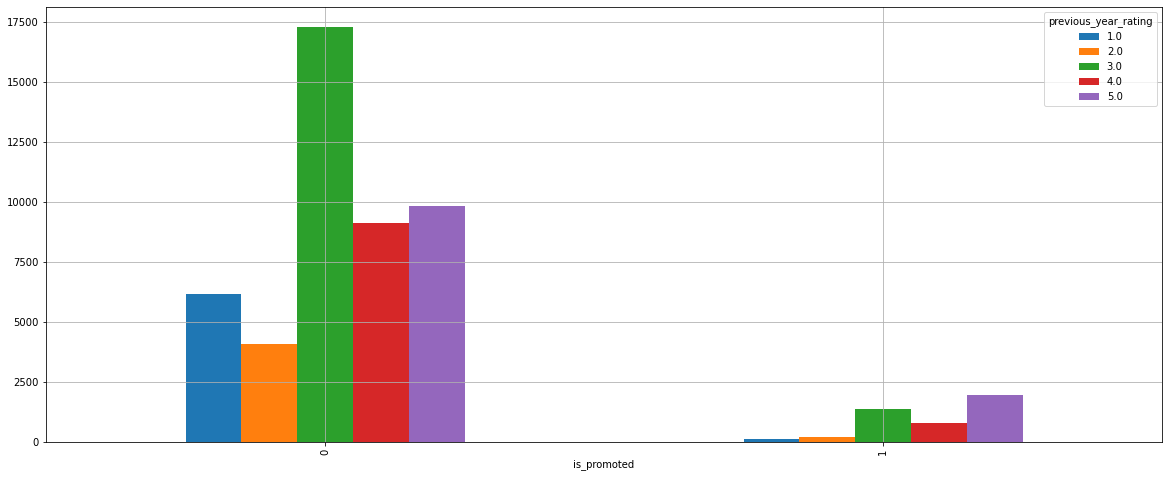

In [26]:
pd.crosstab(index = data['is_promoted'], columns = data['previous_year_rating']).plot.bar(figsize=(20, 8)).grid(zorder = 0)

**avg_training_score**

In [27]:
pd.DataFrame(data['avg_training_score'].describe())

,avg_training_score
count,54808.000000
mean,63.386750
std,13.371559
min,39.000000
25%,51.000000
50%,60.000000
75%,76.000000
max,99.000000


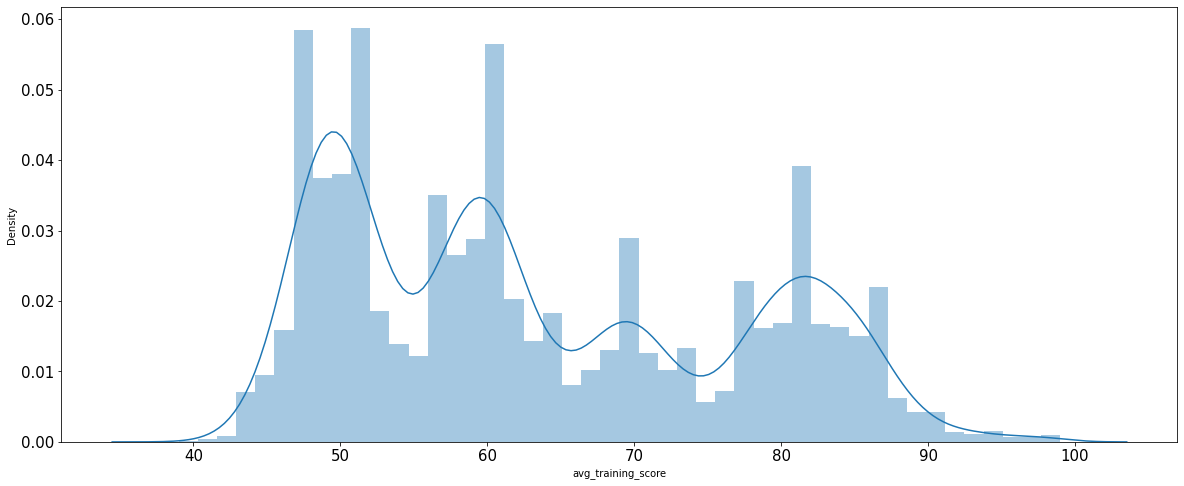

In [28]:
plt.figure(figsize=(20, 8))
sns.distplot(data['avg_training_score'])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

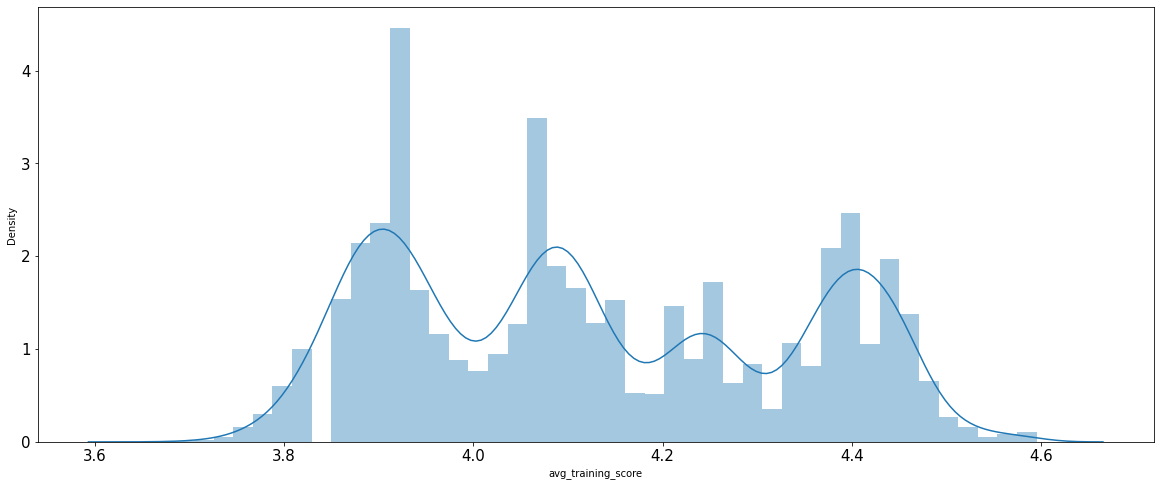

In [29]:
plt.figure(figsize=(20, 8))
sns.distplot(np.log(data['avg_training_score']))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [30]:
pd.crosstab(index = data['is_promoted'], columns = data['avg_training_score'], margins = True, normalize = 'index').round(2) * 100

avg_training_score,39,40,41,42,43,44,45,46,47,48,...,90,91,92,93,94,95,96,97,98,99
is_promoted,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,3.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
All,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


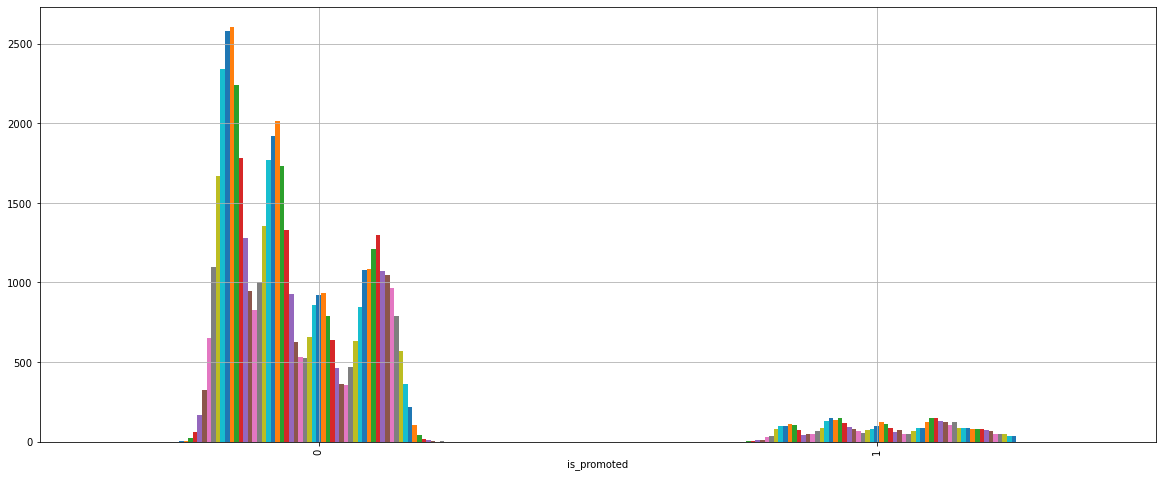

In [31]:
pd.crosstab(index = data['is_promoted'], columns = data['avg_training_score']).plot.bar(figsize=(20, 8), legend = False).grid(zorder = 0)

**age**

In [32]:
pd.DataFrame(data['age'].describe())

,age
count,54808.000000
mean,34.803915
std,7.660169
min,20.000000
25%,29.000000
50%,33.000000
75%,39.000000
max,60.000000


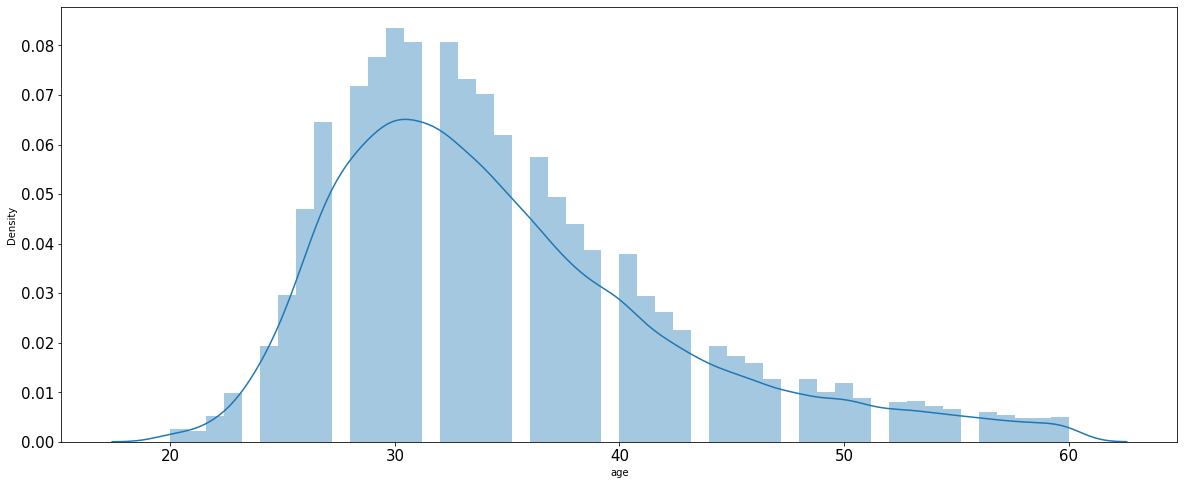

In [33]:
plt.figure(figsize=(20, 8))
sns.distplot(data['age'])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

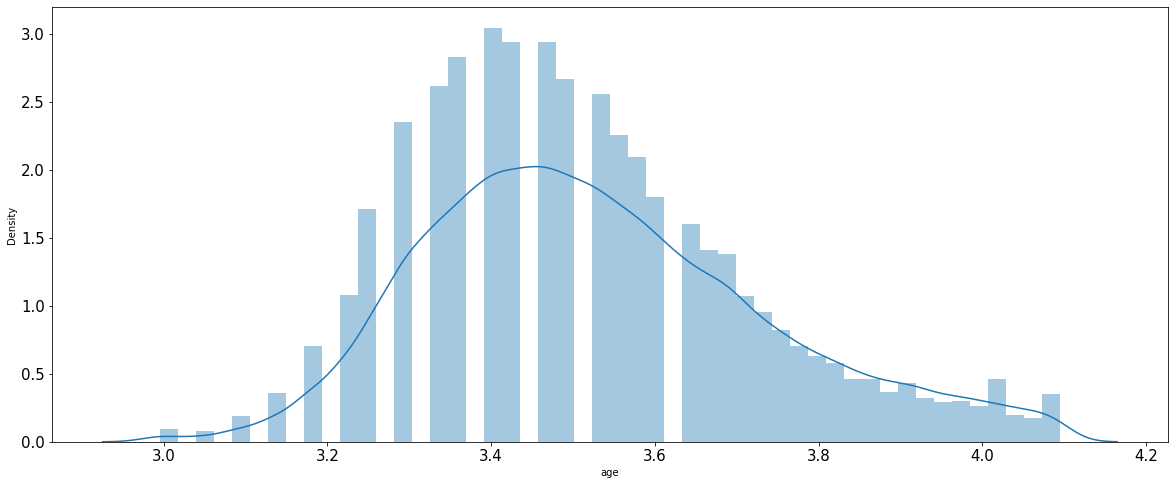

In [34]:
plt.figure(figsize=(20, 8))
sns.distplot(np.log(data['age']))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [35]:
pd.crosstab(index = data['is_promoted'], columns = data['age'], margins = True, normalize = 'index').round(2) * 100

age,20,21,22,23,24,25,26,27,28,29,...,51,52,53,54,55,56,57,58,59,60
is_promoted,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,1.0,2.0,2.0,4.0,5.0,6.0,6.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,1.0,3.0,6.0,7.0,6.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
All,0.0,0.0,0.0,1.0,2.0,2.0,4.0,5.0,6.0,6.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


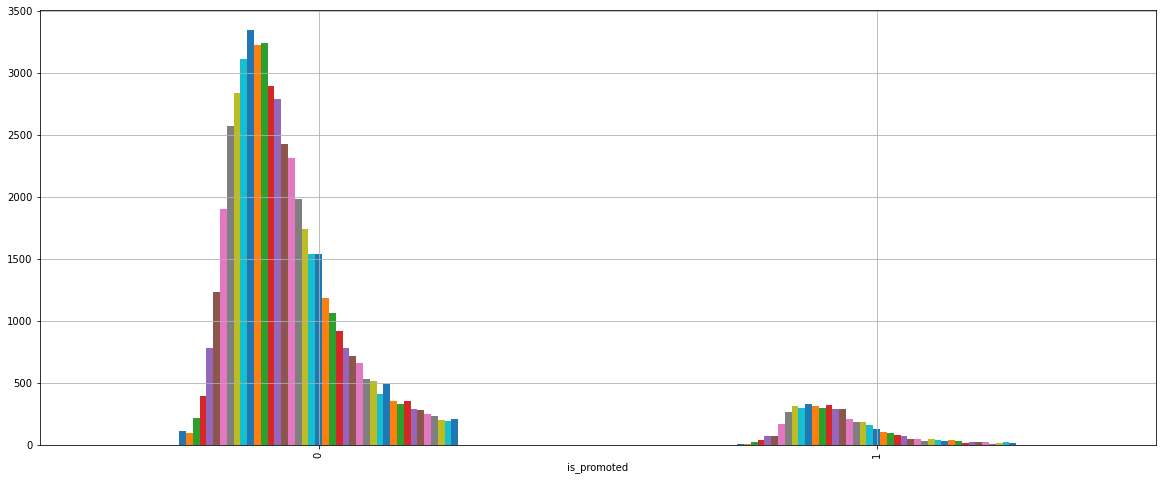

In [36]:
pd.crosstab(index = data['is_promoted'], columns = data['age']).plot.bar(figsize=(20, 8), legend = False).grid(zorder = 0)

**length_of_service**

In [37]:
pd.DataFrame(data['length_of_service'].describe())

,length_of_service
count,54808.000000
mean,5.865512
std,4.265094
min,1.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,37.000000


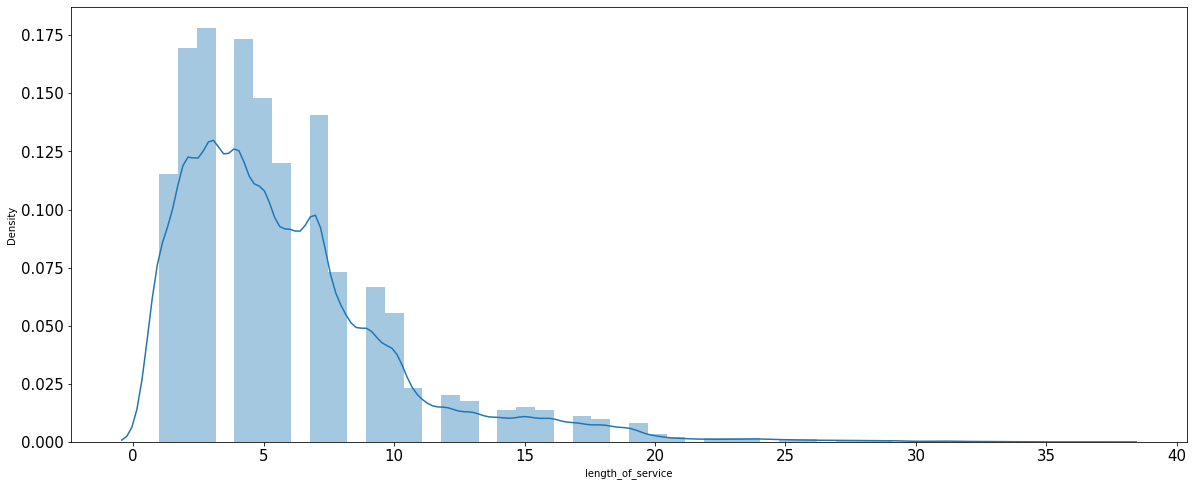

In [38]:
plt.figure(figsize=(20, 8))
sns.distplot(data['length_of_service'])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [39]:
pd.crosstab(index = data['is_promoted'], columns = data['length_of_service'], margins = True, normalize = 'index').round(2) * 100

length_of_service,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,37
is_promoted,,,,,,,,,,,,,,,,,,,,,
0,8.0,12.0,13.0,12.0,11.0,9.0,10.0,5.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8.0,13.0,13.0,13.0,10.0,9.0,10.0,6.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
All,8.0,12.0,13.0,12.0,11.0,9.0,10.0,5.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


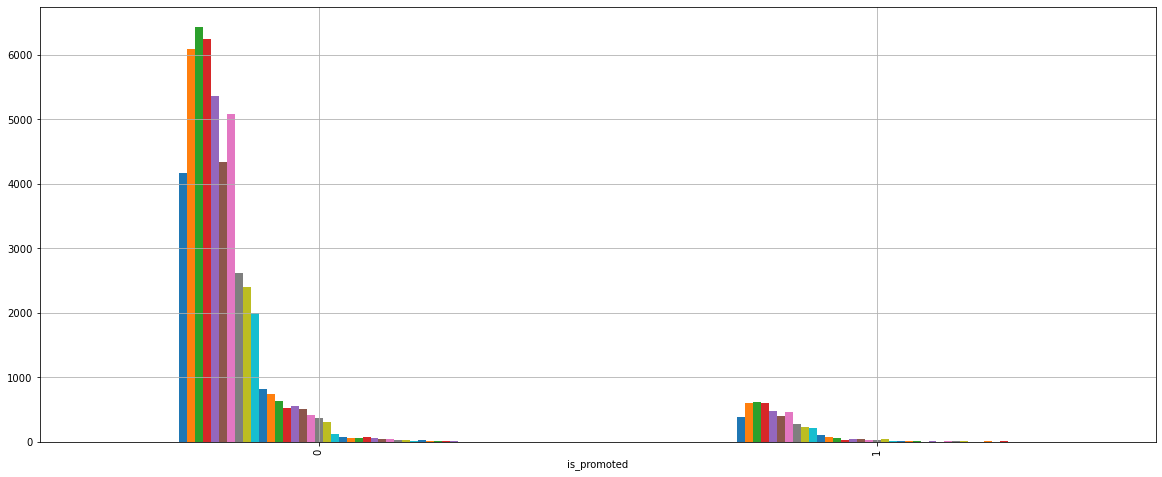

In [40]:
pd.crosstab(index = data['is_promoted'], columns = data['length_of_service']).plot.bar(figsize=(20, 8), legend = False).grid(zorder = 0)

**no_of_trainings**

In [41]:
data['no_of_trainings'].value_counts(dropna = False)

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
8         5
10        5
9         5
Name: no_of_trainings, dtype: int64

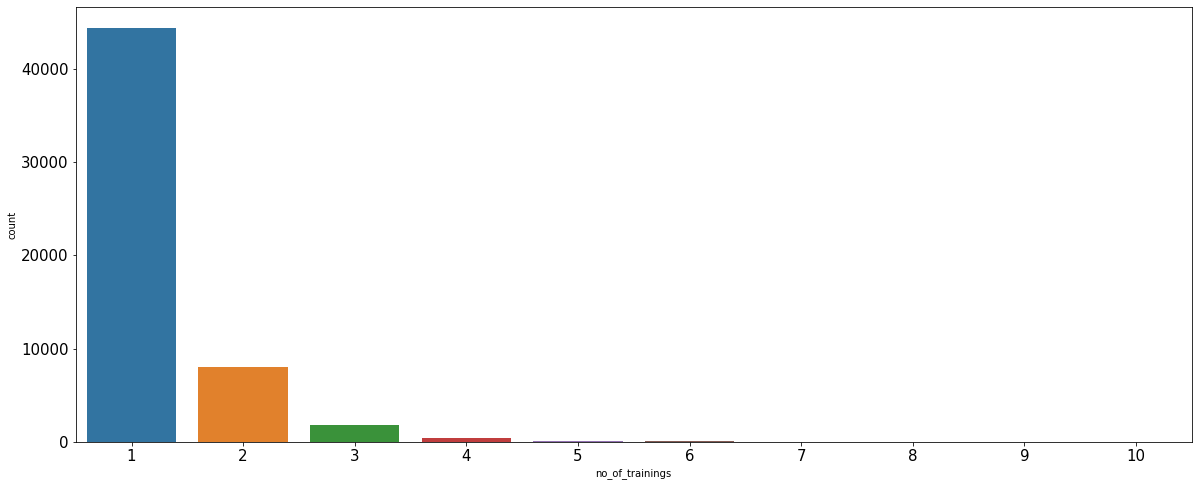

In [42]:
plt.figure(figsize=(20, 8))
sns.countplot(data = data, x = 'no_of_trainings')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [43]:
pd.crosstab(index = data['is_promoted'], columns = data['no_of_trainings'], margins = True, normalize = 'index').round(2) * 100

no_of_trainings,1,2,3,4,5,6,7,8,9,10
is_promoted,,,,,,,,,,
0,81.0,15.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,84.0,13.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
All,81.0,15.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


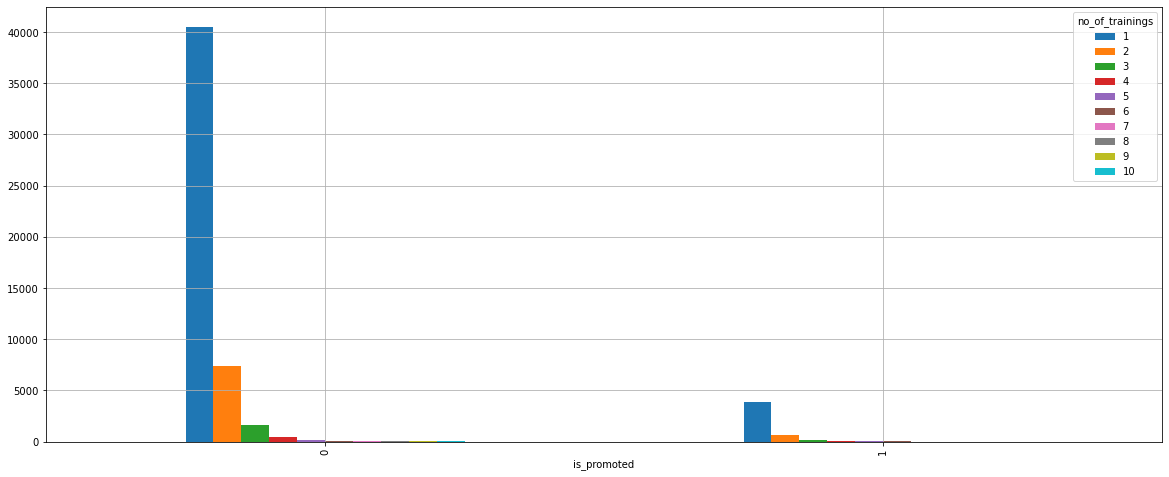

In [44]:
pd.crosstab(index = data['is_promoted'], columns = data['no_of_trainings']).plot.bar(figsize=(20, 8)).grid(zorder = 0)

**KPIs_met >80%**

In [45]:
data['KPIs_met >80%'].value_counts(dropna = False)

0    35517
1    19291
Name: KPIs_met >80%, dtype: int64

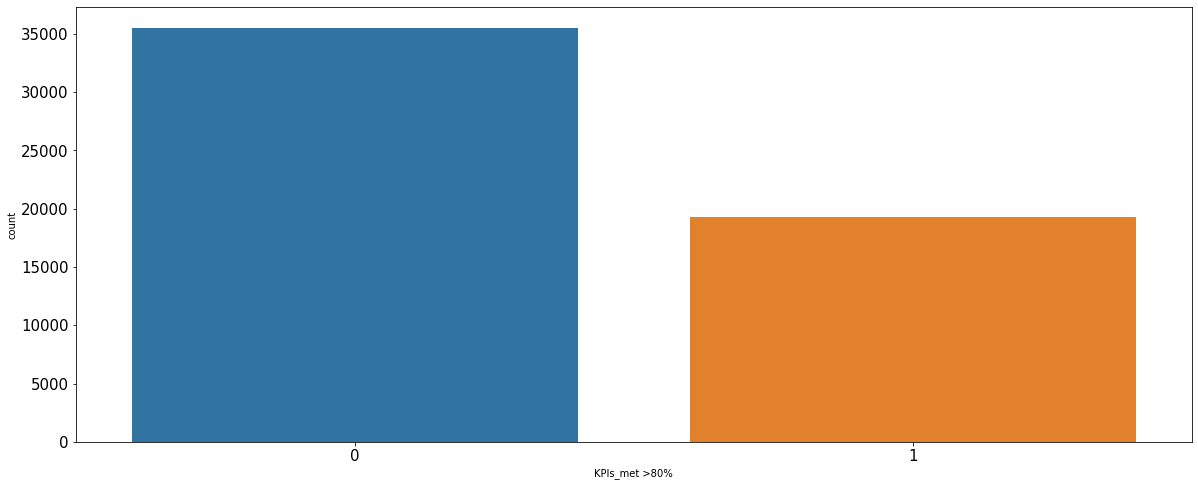

In [46]:
plt.figure(figsize=(20, 8))
sns.countplot(data = data, x = 'KPIs_met >80%')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [47]:
pd.crosstab(index = data['is_promoted'], columns = data['KPIs_met >80%'], margins = True, normalize = 'index').round(2) * 100

KPIs_met >80%,0,1
is_promoted,,
0,68.0,32.0
1,30.0,70.0
All,65.0,35.0


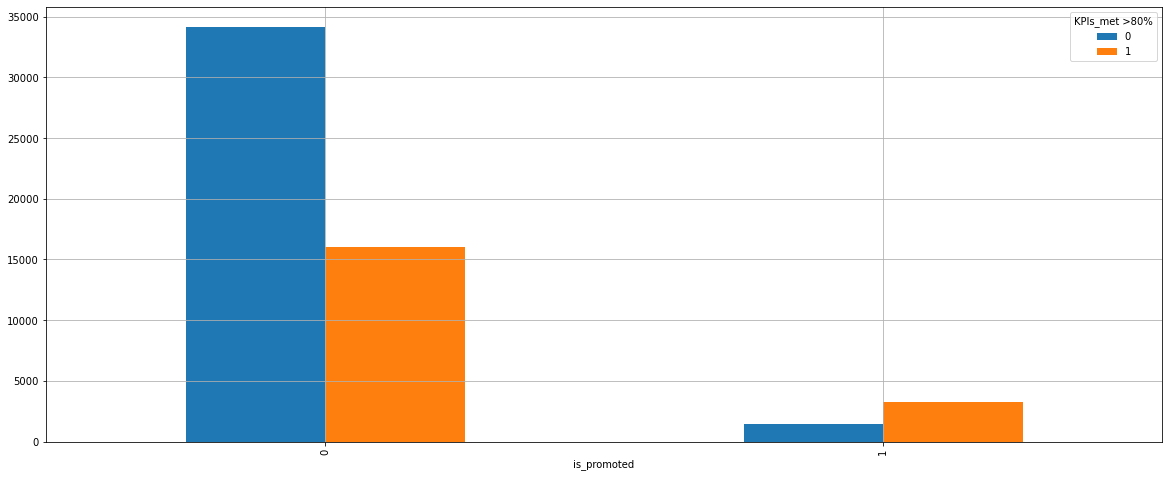

In [48]:
pd.crosstab(index = data['is_promoted'], columns = data['KPIs_met >80%']).plot.bar(figsize=(20, 8)).grid(zorder = 0)

**awards_won?**

In [49]:
data['awards_won?'].value_counts(dropna = False)

0    53538
1     1270
Name: awards_won?, dtype: int64

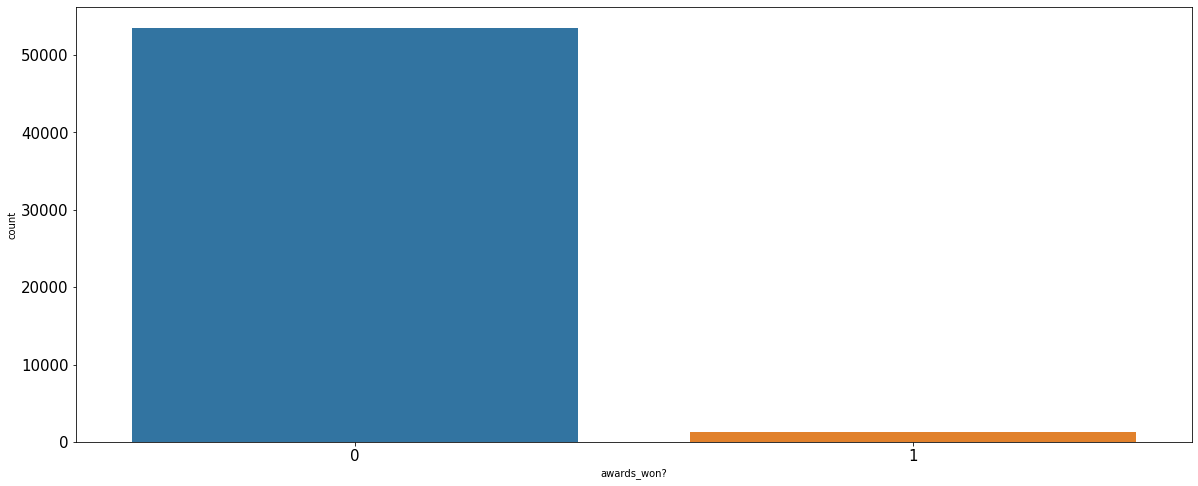

In [50]:
plt.figure(figsize=(20, 8))
sns.countplot(data = data, x = 'awards_won?')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [51]:
pd.crosstab(index = data['is_promoted'], columns = data['awards_won?'], margins = True, normalize = 'index').round(2) * 100

awards_won?,0,1
is_promoted,,
0,99.0,1.0
1,88.0,12.0
All,98.0,2.0


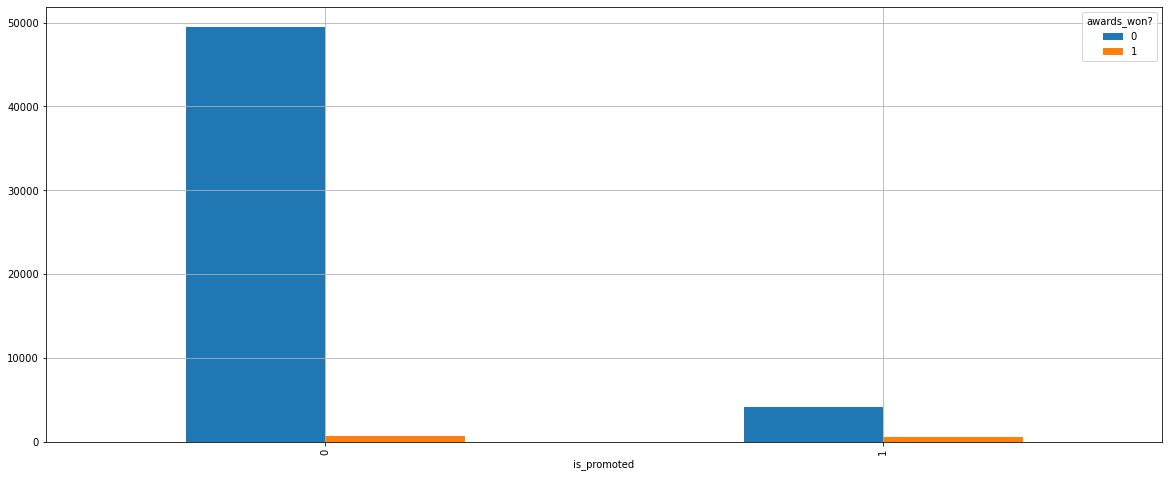

In [52]:
pd.crosstab(index = data['is_promoted'], columns = data['awards_won?']).plot.bar(figsize=(20, 8)).grid(zorder = 0)

**region**

In [53]:
data['region'].value_counts(dropna = False)

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

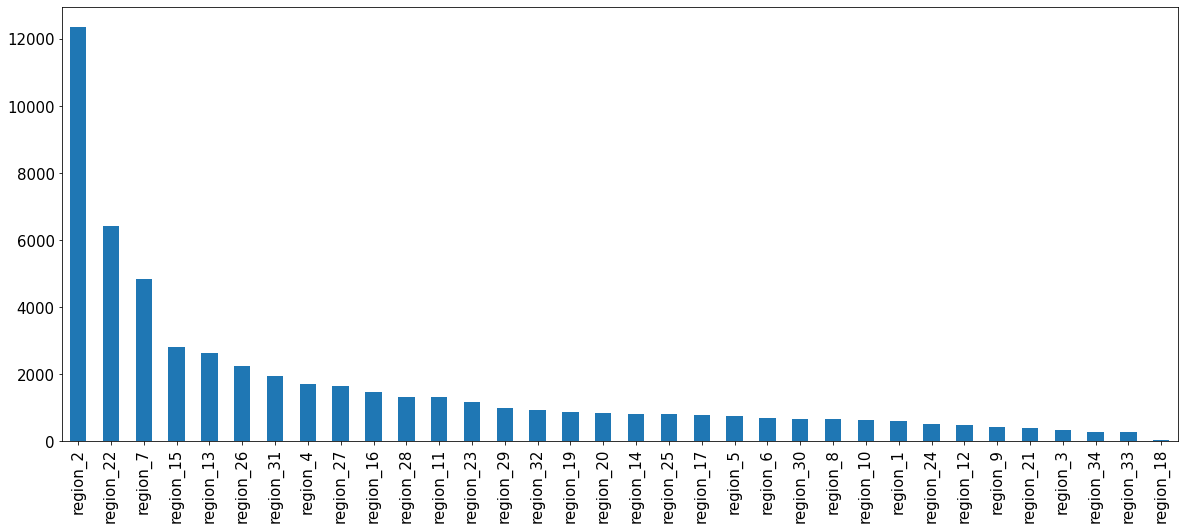

In [54]:
plt.figure(figsize=(20, 8))
data['region'].value_counts().plot.bar()
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [55]:
pd.crosstab(index = data['is_promoted'], columns = data['region'], margins = True, normalize = 'index').round(2) * 100

region,region_1,region_10,region_11,region_12,region_13,region_14,region_15,region_16,region_17,region_18,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
is_promoted,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,2.0,1.0,5.0,2.0,5.0,3.0,1.0,0.0,...,4.0,2.0,1.0,1.0,3.0,1.0,1.0,9.0,1.0,1.0
1,1.0,1.0,2.0,1.0,5.0,1.0,5.0,2.0,2.0,0.0,...,2.0,1.0,0.0,0.0,5.0,1.0,1.0,11.0,1.0,0.0
All,1.0,1.0,2.0,1.0,5.0,2.0,5.0,3.0,1.0,0.0,...,4.0,2.0,0.0,1.0,3.0,1.0,1.0,9.0,1.0,1.0


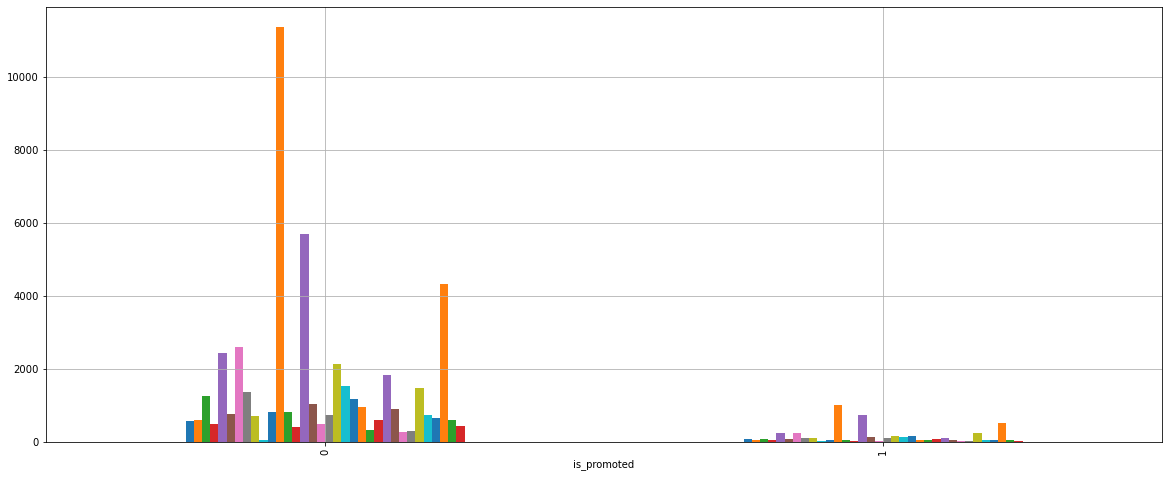

In [56]:
pd.crosstab(index = data['is_promoted'], columns = data['region']).plot.bar(figsize=(20, 8), legend = False).grid(zorder = 0)

**department**

In [57]:
data['department'].value_counts(dropna = False)

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

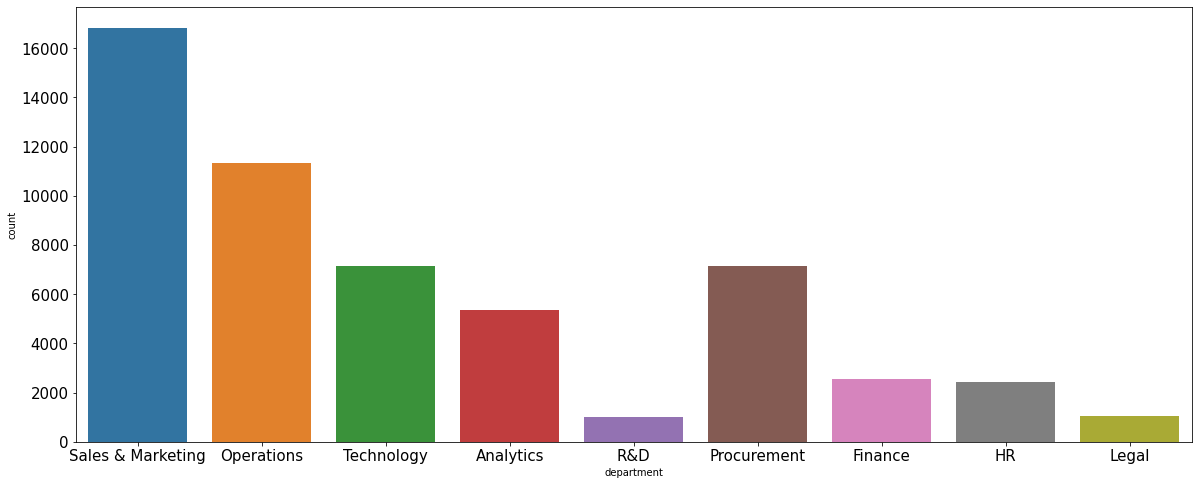

In [58]:
plt.figure(figsize=(20, 8))
sns.countplot(data = data, x = 'department')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [59]:
pd.crosstab(index = data['is_promoted'], columns = data['department'], margins = True, normalize = 'index').round(2) * 100

department,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
is_promoted,,,,,,,,,
0,10.0,5.0,5.0,2.0,21.0,13.0,2.0,31.0,13.0
1,11.0,4.0,3.0,1.0,22.0,15.0,1.0,26.0,16.0
All,10.0,5.0,4.0,2.0,21.0,13.0,2.0,31.0,13.0


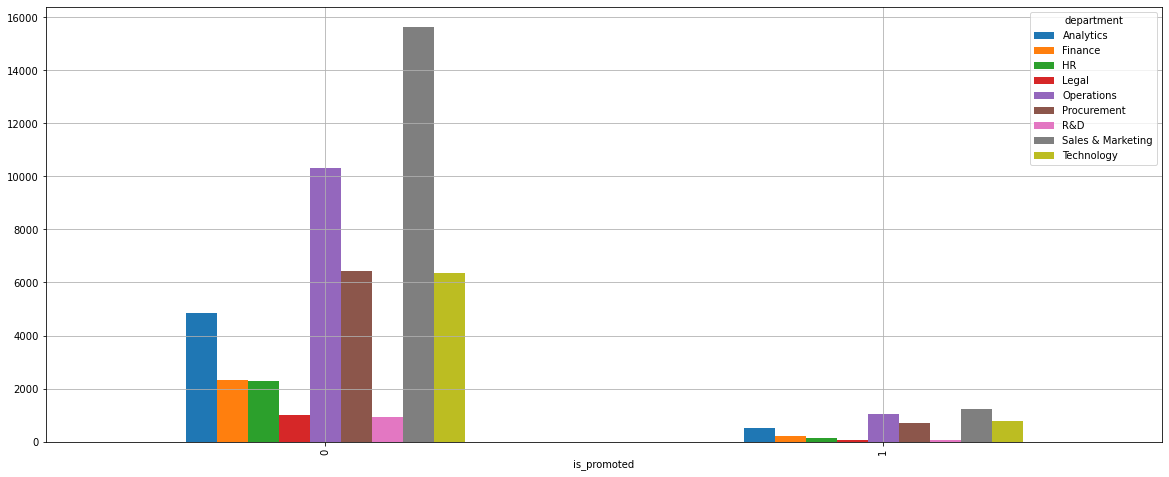

In [60]:
pd.crosstab(index = data['is_promoted'], columns = data['department']).plot.bar(figsize=(20, 8)).grid(zorder = 0)

**gender**

In [61]:
data['gender'].value_counts(dropna = False)

m    38496
f    16312
Name: gender, dtype: int64

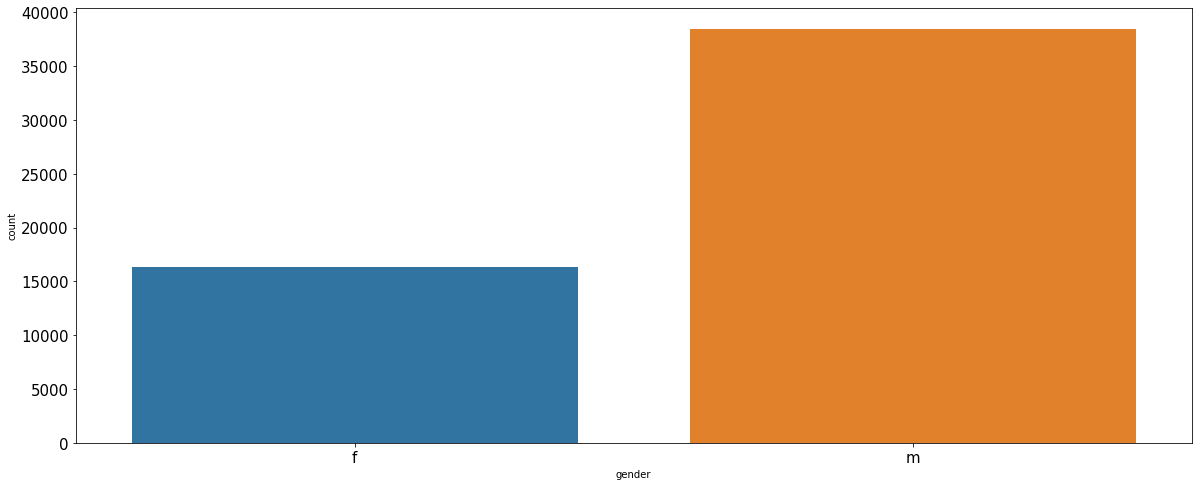

In [62]:
plt.figure(figsize=(20, 8))
sns.countplot(data = data, x = 'gender')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [63]:
pd.crosstab(index = data['is_promoted'], columns = data['gender'], margins = True, normalize = 'index').round(2) * 100

gender,f,m
is_promoted,,
0,30.0,70.0
1,31.0,69.0
All,30.0,70.0


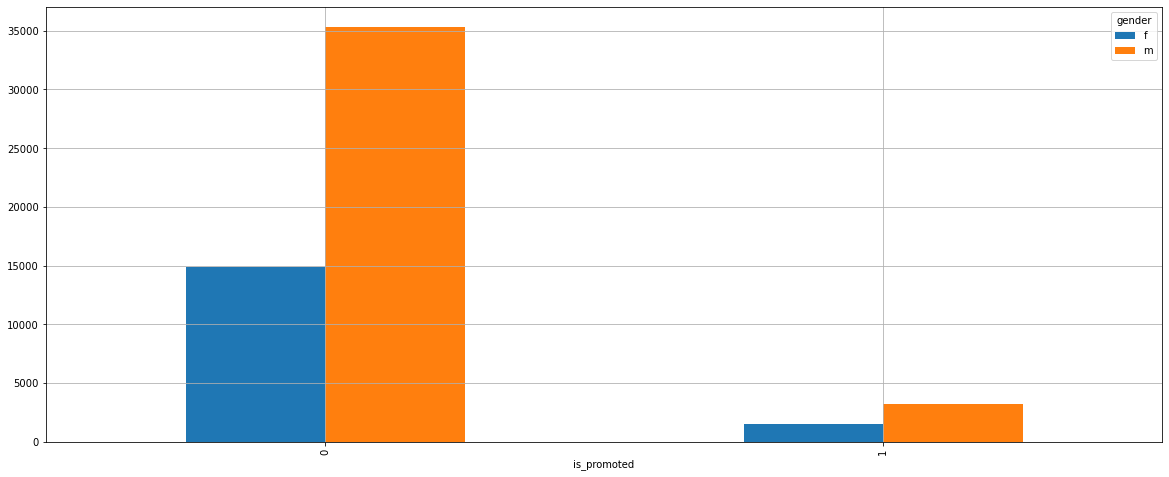

In [64]:
pd.crosstab(index = data['is_promoted'], columns = data['gender']).plot.bar(figsize=(20, 8)).grid(zorder = 0)

**recruitment_channel**

In [65]:
data['recruitment_channel'].value_counts(dropna = False)

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

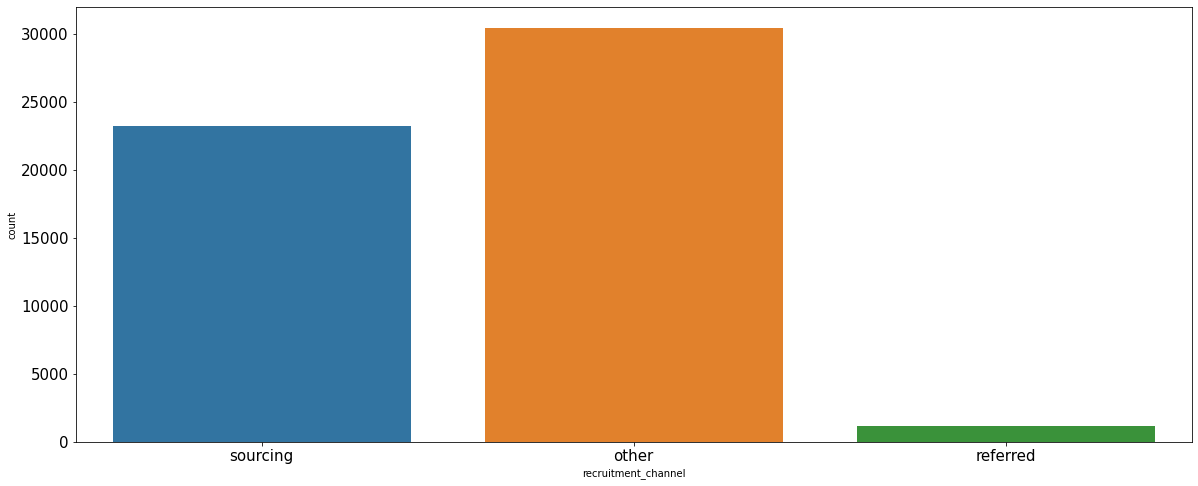

In [66]:
plt.figure(figsize=(20, 8))
sns.countplot(data = data, x = 'recruitment_channel')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [67]:
pd.crosstab(index = data['is_promoted'], columns = data['recruitment_channel'], margins = True, normalize = 'index').round(2) * 100

recruitment_channel,other,referred,sourcing
is_promoted,,,
0,56.0,2.0,42.0
1,55.0,3.0,42.0
All,56.0,2.0,42.0


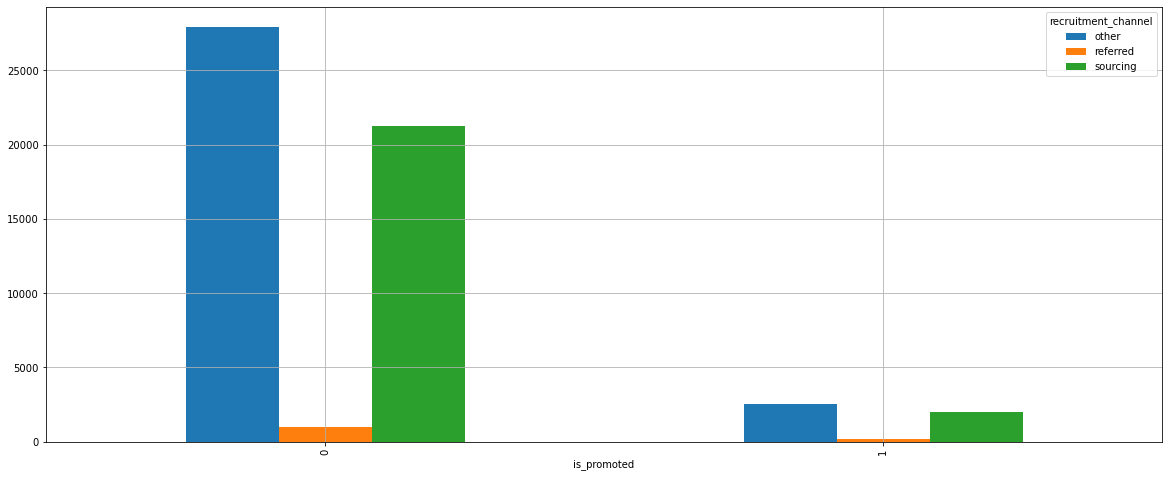

In [68]:
pd.crosstab(index = data['is_promoted'], columns = data['recruitment_channel']).plot.bar(figsize=(20, 8)).grid(zorder = 0)

# 5) Tratamiento de valores nulos

In [69]:
import missingno as msno

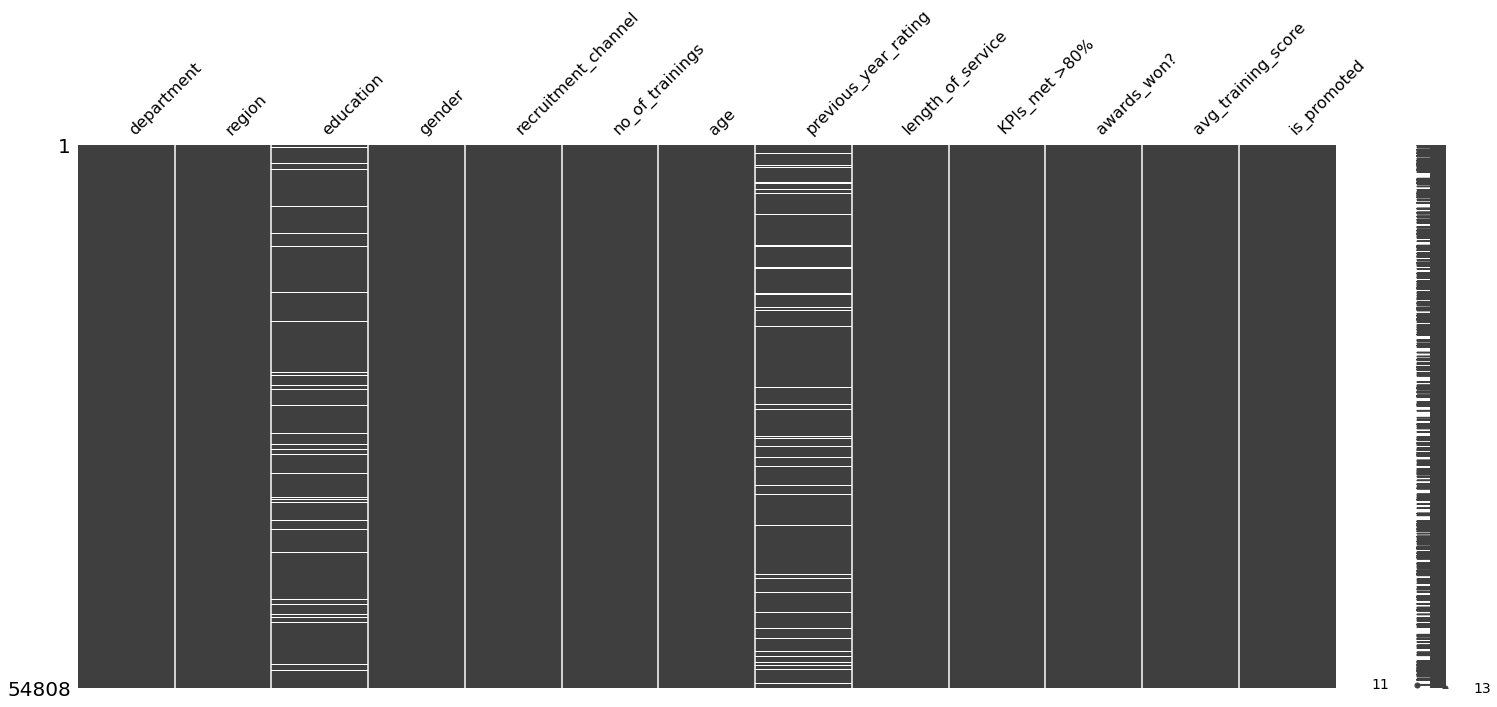

In [70]:
msno.matrix(data)
plt.show()

In [71]:
data.isnull().sum().sort_values(ascending=False)

previous_year_rating    4124
education               2409
department                 0
region                     0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

El método de imputación depende de la naturaleza de la variable. Separamos las variables categóricas de las numéricas.

In [72]:
data_cat = data.select_dtypes('object')
data_num = data.select_dtypes('number')

In [73]:
data_cat.head()

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other


In [74]:
data_num.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,1,35,5.0,8,1,0,49,0
1,1,30,5.0,4,0,0,60,0
2,1,34,3.0,7,0,0,50,0
3,2,39,1.0,10,0,0,50,0
4,1,45,3.0,2,0,0,73,0


**Imputación de numéricas**

In [75]:
# Para previous_year_rating, primero veremos si esto es, porque recién el empleado solo tiene 1 año de trabajo.
# Si esto es cierto, se llenarán con 0.

data[data['length_of_service'] == 1].previous_year_rating.isnull().sum()

4124

In [76]:
data.previous_year_rating.isnull().sum()

4124

Al parecer, sí es cierto la hipótesis planteada. Entonces, los datos nulos se cambiarán por 0

In [77]:
from sklearn.impute import SimpleImputer

In [78]:
imputer_num = SimpleImputer(strategy = 'constant', fill_value = 0)

In [79]:
imputer_num.fit(data_num)

SimpleImputer(fill_value=0, strategy='constant')

In [80]:
imputer_num.statistics_

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [81]:
imputer_num.transform(data_num)

array([[ 1., 35.,  5., ...,  0., 49.,  0.],
       [ 1., 30.,  5., ...,  0., 60.,  0.],
       [ 1., 34.,  3., ...,  0., 50.,  0.],
       ...,
       [ 1., 27.,  5., ...,  0., 79.,  0.],
       [ 1., 29.,  1., ...,  0., 45.,  0.],
       [ 1., 27.,  1., ...,  0., 49.,  0.]])

In [82]:
data_num_imputed = pd.DataFrame(data = imputer_num.transform(data_num), columns = data_num.columns)

In [83]:
data_num.isnull().sum()

no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [84]:
data_num_imputed.isnull().sum()

no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

**Imputación de categóricas**

In [85]:
# Rellenaremos los datos vacíos con la mayor frecuencia de la variable education
imputer_cat = SimpleImputer(strategy='most_frequent')
imputer_cat.fit(data_cat)
data_cat_imputed = pd.DataFrame(imputer_cat.transform(data_cat), columns = data_cat.columns)

data_cat_imputed.isnull().sum()

department             0
region                 0
education              0
gender                 0
recruitment_channel    0
dtype: int64

Ya no tenemos valores nulos

# 6) Outliers

In [86]:
data_num_imputed.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.078748,5.865512,0.351974,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.496458,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,20.000000,0.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,2.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [87]:
data_num_imputed[['length_of_service', 'age']].describe()

,length_of_service,age
count,54808.000000,54808.000000
mean,5.865512,34.803915
std,4.265094,7.660169
min,1.000000,20.000000
25%,3.000000,29.000000
50%,5.000000,33.000000
75%,7.000000,39.000000
max,37.000000,60.000000


Se puede ver que length_of_service y age tienen una diferencia notable en el 75% con el max. Comprobaremos con divisiones más pequeñas

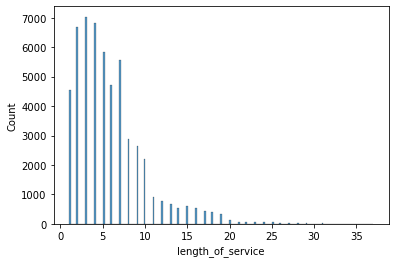

In [88]:
sns.histplot(data = data_num_imputed, x = 'length_of_service')
plt.show()

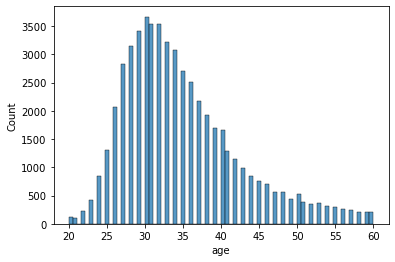

In [89]:
sns.histplot(data = data_num_imputed, x = 'age')
plt.show()

In [90]:
data_num_imputed[['length_of_service', 'age']].describe(percentiles = [0.01, 0.025, 0.05, 0.1, 0.5, 0.75, 0.9, 0.95, 0.975, 0.99])

,length_of_service,age
count,54808.000000,54808.000000
mean,5.865512,34.803915
std,4.265094,7.660169
min,1.000000,20.000000
1%,1.000000,23.000000
2.5%,1.000000,24.000000
5%,1.000000,25.000000
10%,2.000000,27.000000
50%,5.000000,33.000000
75%,7.000000,39.000000


Al parecer la variable age, sí está bien. Sin embargo, length_of_service, sí se nota que hay una diferencia notable en el 99% y el max

**Variable `length_of_service`**

In [91]:
p1 = np.percentile(data_num_imputed['length_of_service'], 1)
p99 = np.percentile(data_num_imputed['length_of_service'], 99)

In [92]:
p1, p99

(1.0, 20.0)

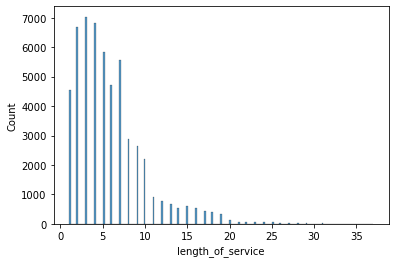

In [93]:
sns.histplot(data = data_num_imputed, x = 'length_of_service')
plt.show()

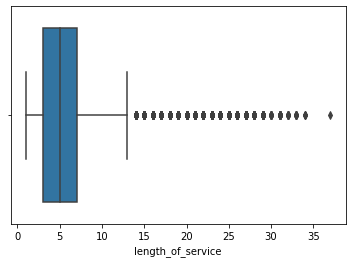

In [94]:
sns.boxplot(data = data_num_imputed, x = 'length_of_service')
plt.show()

`np.clip` limita los bordes del intervalo a unos valores dados

In [95]:
data_num_imputed['length_of_service'] = np.clip(data_num_imputed['length_of_service'], p1, p99)

Veamos los cambios en la distribución:

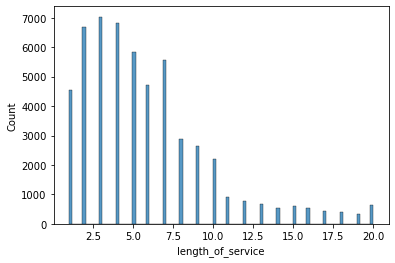

In [96]:
sns.histplot(data = data_num_imputed, x = 'length_of_service')
plt.show()

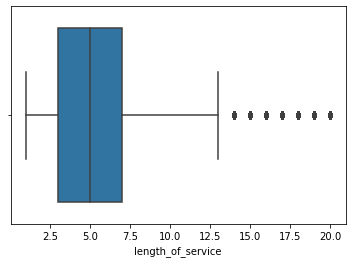

In [97]:
sns.boxplot(data = data_num_imputed, x = 'length_of_service')
plt.show()

# 7) Análisis de Correlación

**Primero hay que consolidar**

In [98]:
data_num_imputed.shape

(54808, 8)

In [99]:
data_cat_imputed.shape

(54808, 5)

pd.concat nos permite concatenar las bases anteriormente revisadas:

In [100]:
data_total = pd.concat([data_num_imputed, data_cat_imputed], axis = 1)
data_total.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department,region,education,gender,recruitment_channel
0,1.0,35.0,5.0,8.0,1.0,0.0,49.0,0.0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,1.0,30.0,5.0,4.0,0.0,0.0,60.0,0.0,Operations,region_22,Bachelor's,m,other
2,1.0,34.0,3.0,7.0,0.0,0.0,50.0,0.0,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,2.0,39.0,1.0,10.0,0.0,0.0,50.0,0.0,Sales & Marketing,region_23,Bachelor's,m,other
4,1.0,45.0,3.0,2.0,0.0,0.0,73.0,0.0,Technology,region_26,Bachelor's,m,other


**Correlación**

Ahora haremos una correlación de datos, para ver si tienen alguna relación fuerte entre ellas.

In [101]:
def tidy_corr_matrix(corr_mat):
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

In [102]:
corr_matrix = data_total.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix)#.head(10)

,variable_1,variable_2,r,abs_r
11,age,length_of_service,0.657687,0.657687
25,length_of_service,age,0.657687,0.657687
34,KPIs_met >80%,previous_year_rating,0.274593,0.274593
20,previous_year_rating,KPIs_met >80%,0.274593,0.274593
39,KPIs_met >80%,is_promoted,0.221582,0.221582
60,is_promoted,KPIs_met >80%,0.221582,0.221582
26,length_of_service,previous_year_rating,0.198669,0.198669
19,previous_year_rating,length_of_service,0.198669,0.198669
47,awards_won?,is_promoted,0.195871,0.195871
61,is_promoted,awards_won?,0.195871,0.195871


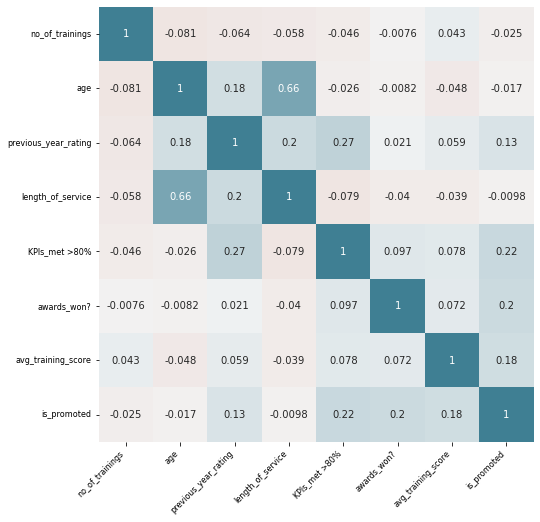

In [103]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

**Interpretación**

- 1) La variable length_of_service y age están fuertemente relacionados. Si uno aumenta, el otro aumenta.
- 2) La variable target, is promoted, no se ve que tenga correlación fuerte con alguna variable.
- 3) La variable KPI y previous_year_rating tienen alguna relación también. Mientrás más puntaje de previous_year_rating tengas, más probabilidad de tener KPI > 80%

# 8) Creación de nuevas variables

No encontramos ninguna forma de crear alguna nueva variable

# 9) Labeling/Encoding de variables categóricas

In [104]:
data_cat_imputed.describe()

,department,region,education,gender,recruitment_channel
count,54808,54808,54808,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,39078,38496,30446


In [105]:
data_cat_imputed.head(10)

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other
5,Analytics,region_2,Bachelor's,m,sourcing
6,Operations,region_20,Bachelor's,f,other
7,Operations,region_34,Master's & above,m,sourcing
8,Analytics,region_20,Bachelor's,m,other
9,Sales & Marketing,region_1,Master's & above,m,sourcing


**Encoding**

In [106]:
data_cat_imputed[['gender', 'recruitment_channel', 'education']].describe()

,gender,recruitment_channel,education
count,54808,54808,54808
unique,2,3,3
top,m,other,Bachelor's
freq,38496,30446,39078


In [107]:
data_cat_dummies = pd.get_dummies(data_cat_imputed[['gender', 'recruitment_channel', 'education']])

In [108]:
data_cat_dummies.head()

,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,education_Bachelor's,education_Below Secondary,education_Master's & above
0,1,0,0,0,1,0,0,1
1,0,1,1,0,0,1,0,0
2,0,1,0,0,1,1,0,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0


# 10) Eliminar variables innecesarias

**Consolidar**

In [109]:
data_total = pd.concat([data_num_imputed, data_cat_dummies, data_cat[['department', 'region']]], axis = 1)
data_total.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,education_Bachelor's,education_Below Secondary,education_Master's & above,department,region
0,1.0,35.0,5.0,8.0,1.0,0.0,49.0,0.0,1,0,0,0,1,0,0,1,Sales & Marketing,region_7
1,1.0,30.0,5.0,4.0,0.0,0.0,60.0,0.0,0,1,1,0,0,1,0,0,Operations,region_22
2,1.0,34.0,3.0,7.0,0.0,0.0,50.0,0.0,0,1,0,0,1,1,0,0,Sales & Marketing,region_19
3,2.0,39.0,1.0,10.0,0.0,0.0,50.0,0.0,0,1,1,0,0,1,0,0,Sales & Marketing,region_23
4,1.0,45.0,3.0,2.0,0.0,0.0,73.0,0.0,0,1,1,0,0,1,0,0,Technology,region_26


In [110]:
var_cat = ['is_promoted', 'region', 'department']

In [111]:
cols = data_total.drop(columns = var_cat)
cols

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,education_Bachelor's,education_Below Secondary,education_Master's & above
0,1.0,35.0,5.0,8.0,1.0,0.0,49.0,1,0,0,0,1,0,0,1
1,1.0,30.0,5.0,4.0,0.0,0.0,60.0,0,1,1,0,0,1,0,0
2,1.0,34.0,3.0,7.0,0.0,0.0,50.0,0,1,0,0,1,1,0,0
3,2.0,39.0,1.0,10.0,0.0,0.0,50.0,0,1,1,0,0,1,0,0
4,1.0,45.0,3.0,2.0,0.0,0.0,73.0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,1.0,48.0,3.0,17.0,0.0,0.0,78.0,0,1,0,0,1,1,0,0
54804,1.0,37.0,2.0,6.0,0.0,0.0,56.0,1,0,1,0,0,0,0,1
54805,1.0,27.0,5.0,3.0,1.0,0.0,79.0,0,1,1,0,0,1,0,0
54806,1.0,29.0,1.0,2.0,0.0,0.0,45.0,0,1,0,0,1,1,0,0


In [112]:
from scipy.stats import ttest_ind

data_si = data_total[data_total['is_promoted'] == 1]
data_no = data_total[data_total['is_promoted'] == 0]
pvalor = []

for x in range(0, len(cols.columns)):
    var1 = data_si[cols.columns[x]]
    var2 = data_no[cols.columns[x]]
    pvalor.append(ttest_ind(var1, var2).pvalue)

In [113]:
pd.DataFrame({'Variable':cols.columns, 'P_Valor': pvalor}).sort_values('P_Valor', ascending = False)

,Variable,P_Valor
11,recruitment_channel_sourcing,9.100420e-01
13,education_Below Secondary,8.425175e-01
9,recruitment_channel_other,2.534121e-01
3,length_of_service,2.145193e-02
8,gender_m,9.300828e-03
7,gender_f,9.300828e-03
1,age,5.846305e-05
10,recruitment_channel_referred,1.274413e-05
0,no_of_trainings,5.570014e-09
12,education_Bachelor's,1.966371e-11


In [114]:
T_values = pd.DataFrame({'Variable':cols.columns, 'P_Valor': pvalor})
print(T_values.shape)
T_values = T_values[T_values['P_Valor'] < 0.05] #> 0.05
print(T_values.shape)

(15, 2)
(12, 2)


In [115]:
data_total = pd.concat([data_total[T_values.Variable], data_total[var_cat]], axis = 1)

In [116]:
data_total

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,gender_f,gender_m,recruitment_channel_referred,education_Bachelor's,education_Master's & above,is_promoted,region,department
0,1.0,35.0,5.0,8.0,1.0,0.0,49.0,1,0,0,0,1,0.0,region_7,Sales & Marketing
1,1.0,30.0,5.0,4.0,0.0,0.0,60.0,0,1,0,1,0,0.0,region_22,Operations
2,1.0,34.0,3.0,7.0,0.0,0.0,50.0,0,1,0,1,0,0.0,region_19,Sales & Marketing
3,2.0,39.0,1.0,10.0,0.0,0.0,50.0,0,1,0,1,0,0.0,region_23,Sales & Marketing
4,1.0,45.0,3.0,2.0,0.0,0.0,73.0,0,1,0,1,0,0.0,region_26,Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,1.0,48.0,3.0,17.0,0.0,0.0,78.0,0,1,0,1,0,0.0,region_14,Technology
54804,1.0,37.0,2.0,6.0,0.0,0.0,56.0,1,0,0,0,1,0.0,region_27,Operations
54805,1.0,27.0,5.0,3.0,1.0,0.0,79.0,0,1,0,1,0,0.0,region_1,Analytics
54806,1.0,29.0,1.0,2.0,0.0,0.0,45.0,0,1,0,1,0,0.0,region_9,Sales & Marketing


Al hacer el análisis de las variables **department** y **region**, se concluyó que son innecesarios para desarrollar el modelo.

- 1) Para el negocio, son variables que no se necesitan para predecir el target.
- 2) Es una variable cualitativa con muchas categorías.

In [117]:
data_total.drop(['department', 'region'], axis = 'columns', inplace = True)
data_total

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,gender_f,gender_m,recruitment_channel_referred,education_Bachelor's,education_Master's & above,is_promoted
0,1.0,35.0,5.0,8.0,1.0,0.0,49.0,1,0,0,0,1,0.0
1,1.0,30.0,5.0,4.0,0.0,0.0,60.0,0,1,0,1,0,0.0
2,1.0,34.0,3.0,7.0,0.0,0.0,50.0,0,1,0,1,0,0.0
3,2.0,39.0,1.0,10.0,0.0,0.0,50.0,0,1,0,1,0,0.0
4,1.0,45.0,3.0,2.0,0.0,0.0,73.0,0,1,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,1.0,48.0,3.0,17.0,0.0,0.0,78.0,0,1,0,1,0,0.0
54804,1.0,37.0,2.0,6.0,0.0,0.0,56.0,1,0,0,0,1,0.0
54805,1.0,27.0,5.0,3.0,1.0,0.0,79.0,0,1,0,1,0,0.0
54806,1.0,29.0,1.0,2.0,0.0,0.0,45.0,0,1,0,1,0,0.0


# 11) Normalización de datos

**Normalizar**

In [118]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data_total = pd.DataFrame(scaler.fit_transform(data_total), columns = data_total.columns)
data_total

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,gender_f,gender_m,recruitment_channel_referred,education_Bachelor's,education_Master's & above,is_promoted
0,0.000000,0.375,1.0,0.368421,1.0,0.0,0.166667,1.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.250,1.0,0.157895,0.0,0.0,0.350000,0.0,1.0,0.0,1.0,0.0,0.0
2,0.000000,0.350,0.6,0.315789,0.0,0.0,0.183333,0.0,1.0,0.0,1.0,0.0,0.0
3,0.111111,0.475,0.2,0.473684,0.0,0.0,0.183333,0.0,1.0,0.0,1.0,0.0,0.0
4,0.000000,0.625,0.6,0.052632,0.0,0.0,0.566667,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,0.000000,0.700,0.6,0.842105,0.0,0.0,0.650000,0.0,1.0,0.0,1.0,0.0,0.0
54804,0.000000,0.425,0.4,0.263158,0.0,0.0,0.283333,1.0,0.0,0.0,0.0,1.0,0.0
54805,0.000000,0.175,1.0,0.105263,1.0,0.0,0.666667,0.0,1.0,0.0,1.0,0.0,0.0
54806,0.000000,0.225,0.2,0.052632,0.0,0.0,0.100000,0.0,1.0,0.0,1.0,0.0,0.0


# 12) División en Train y Test

In [119]:
X = data_total.drop(target, axis = 1)
y = data_total[target]

In [120]:
X.head(2)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,gender_f,gender_m,recruitment_channel_referred,education_Bachelor's,education_Master's & above
0,0.0,0.375,1.0,0.368421,1.0,0.0,0.166667,1.0,0.0,0.0,0.0,1.0
1,0.0,0.250,1.0,0.157895,0.0,0.0,0.350000,0.0,1.0,0.0,1.0,0.0


In [121]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: is_promoted, dtype: float64

In [122]:
# función para dividir la base
from sklearn.model_selection import train_test_split

In [123]:
# usaremos la división train/test en 80/20.
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    stratify = y, 
                                                    random_state = 2022)

In [124]:
X_train.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,gender_f,gender_m,recruitment_channel_referred,education_Bachelor's,education_Master's & above
9279,0.000000,0.275,0.6,0.210526,0.0,0.0,0.716667,0.0,1.0,0.0,1.0,0.0
29333,0.111111,0.200,0.0,0.000000,0.0,0.0,0.716667,1.0,0.0,0.0,1.0,0.0
54742,0.000000,0.200,0.8,0.105263,0.0,0.0,0.133333,0.0,1.0,0.0,1.0,0.0
18001,0.000000,0.250,0.2,0.052632,0.0,0.0,0.333333,1.0,0.0,0.0,1.0,0.0
37964,0.000000,0.425,1.0,0.263158,0.0,0.0,0.716667,0.0,1.0,0.0,0.0,1.0


In [125]:
X_test.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,gender_f,gender_m,recruitment_channel_referred,education_Bachelor's,education_Master's & above
27350,0.000000,0.375,0.4,0.105263,1.0,0.0,0.250000,0.0,1.0,0.0,0.0,1.0
25291,0.222222,0.275,0.8,0.315789,0.0,0.0,0.833333,0.0,1.0,0.0,1.0,0.0
35116,0.000000,0.225,0.6,0.052632,0.0,0.0,0.483333,1.0,0.0,0.0,1.0,0.0
18721,0.000000,0.425,0.8,0.578947,0.0,0.0,0.883333,0.0,1.0,0.0,0.0,1.0
35059,0.000000,0.225,0.8,0.052632,1.0,0.0,0.866667,0.0,1.0,0.0,1.0,0.0


In [126]:
X_train.shape, X_test.shape

((43846, 12), (10962, 12))

In [127]:
y_train.shape, y_test.shape

((43846,), (10962,))

In [128]:
# validación de los promedios de la variable target
y.mean(), y_train.mean(), y_test.mean()

(0.08517004816815063, 0.08516170232176254, 0.08520343003101624)

In [129]:
y_train.value_counts()

0.0    40112
1.0     3734
Name: is_promoted, dtype: int64

In [243]:
y_train.value_counts()/y_train.shape

0.0    0.76924
1.0    0.23076
Name: is_promoted, dtype: float64

In [130]:
y_test.value_counts()

0.0    10028
1.0      934
Name: is_promoted, dtype: int64

In [244]:
y_test.value_counts()/y_test.shape

0.0    0.914797
1.0    0.085203
Name: is_promoted, dtype: float64

In [245]:
target

'is_promoted'

# 13) Balanceo de base train

In [131]:
data[target].value_counts(normalize = True)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

#### Como el target es menor al 20% se tendra que hacer balanceo (el target es 8%)

[Text(0, 0, '0'), Text(1, 0, '1')]

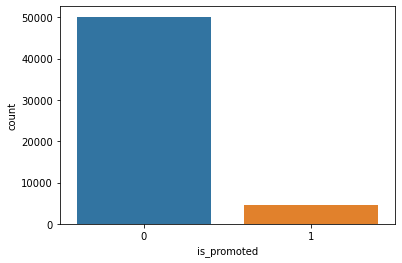

In [132]:
g = sns.countplot(data_total.is_promoted)
g.set_xticklabels([0,1])

In [133]:
data_aux = pd.concat([X_train, y_train], axis = 1)
data_aux

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,gender_f,gender_m,recruitment_channel_referred,education_Bachelor's,education_Master's & above,is_promoted
9279,0.000000,0.275,0.6,0.210526,0.0,0.0,0.716667,0.0,1.0,0.0,1.0,0.0,0.0
29333,0.111111,0.200,0.0,0.000000,0.0,0.0,0.716667,1.0,0.0,0.0,1.0,0.0,1.0
54742,0.000000,0.200,0.8,0.105263,0.0,0.0,0.133333,0.0,1.0,0.0,1.0,0.0,0.0
18001,0.000000,0.250,0.2,0.052632,0.0,0.0,0.333333,1.0,0.0,0.0,1.0,0.0,0.0
37964,0.000000,0.425,1.0,0.263158,0.0,0.0,0.716667,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12271,0.000000,0.075,0.6,0.052632,0.0,0.0,0.583333,0.0,1.0,0.0,1.0,0.0,0.0
1550,0.000000,0.200,0.8,0.052632,1.0,0.0,0.733333,1.0,0.0,0.0,1.0,0.0,0.0
52784,0.222222,0.400,0.6,0.052632,0.0,0.0,0.333333,0.0,1.0,0.0,1.0,0.0,0.0
9124,0.000000,0.500,0.6,0.263158,0.0,0.0,0.416667,0.0,1.0,0.0,1.0,0.0,0.0


In [134]:
import imblearn

#### sampling_strategy es un valor que indica la proporción final de unos y ceros que deben quedar luego del remuestreo

In [247]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state = 42, sampling_strategy = 0.3)

df_smote, target_smote = smote.fit_resample(data_aux.to_numpy(), 
                                            data_aux.is_promoted.to_numpy())

print('Target original shape:', Counter(data_aux.is_promoted))
print('Target balanceado shape', Counter(target_smote)) # verificar que es el % de la categoria no objetivo
print('Data balanceada shape', df_smote.shape)

Target original shape: Counter({0.0: 40112, 1.0: 3734})
Target balanceado shape Counter({0.0: 40112, 1.0: 12033})
Data balanceada shape (52145, 13)


In [246]:
df_smote

array([[0.        , 0.275     , 0.6       , ..., 1.        , 0.        ,
        0.        ],
       [0.11111111, 0.2       , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.        , 0.2       , 0.8       , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.82698714, 0.73863237, ..., 1.        , 0.        ,
        1.        ],
       [0.        , 0.30048298, 0.64077276, ..., 0.        , 1.        ,
        1.        ],
       [0.        , 0.32813608, 0.8       , ..., 1.        , 0.        ,
        1.        ]])

In [136]:
# Convertir el output en dataframe y añadir el nombre de las columnas
df_smote_20 = pd.DataFrame(df_smote, columns=data_aux.columns)
df_smote_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52145 entries, 0 to 52144
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no_of_trainings               52145 non-null  float64
 1   age                           52145 non-null  float64
 2   previous_year_rating          52145 non-null  float64
 3   length_of_service             52145 non-null  float64
 4   KPIs_met >80%                 52145 non-null  float64
 5   awards_won?                   52145 non-null  float64
 6   avg_training_score            52145 non-null  float64
 7   gender_f                      52145 non-null  float64
 8   gender_m                      52145 non-null  float64
 9   recruitment_channel_referred  52145 non-null  float64
 10  education_Bachelor's          52145 non-null  float64
 11  education_Master's & above    52145 non-null  float64
 12  is_promoted                   52145 non-null  float64
dtypes

In [137]:
df_smote_20

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,gender_f,gender_m,recruitment_channel_referred,education_Bachelor's,education_Master's & above,is_promoted
0,0.000000,0.275000,0.600000,0.210526,0.0,0.0,0.716667,0.0,1.0,0.0,1.0,0.0,0.0
1,0.111111,0.200000,0.000000,0.000000,0.0,0.0,0.716667,1.0,0.0,0.0,1.0,0.0,1.0
2,0.000000,0.200000,0.800000,0.105263,0.0,0.0,0.133333,0.0,1.0,0.0,1.0,0.0,0.0
3,0.000000,0.250000,0.200000,0.052632,0.0,0.0,0.333333,1.0,0.0,0.0,1.0,0.0,0.0
4,0.000000,0.425000,1.000000,0.263158,0.0,0.0,0.716667,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52140,0.000000,0.309564,0.600000,0.315789,1.0,0.0,0.353188,0.0,1.0,0.0,0.0,1.0,1.0
52141,0.000000,0.275000,0.101772,0.133911,0.0,1.0,0.932447,0.0,1.0,0.0,1.0,0.0,1.0
52142,0.000000,0.826987,0.738632,0.562798,1.0,0.0,0.189587,1.0,0.0,0.0,1.0,0.0,1.0
52143,0.000000,0.300483,0.640773,0.253445,0.0,0.0,0.638430,0.0,1.0,1.0,0.0,1.0,1.0


In [138]:
df_smote_20.is_promoted.value_counts()/df_smote_20.shape[0]

0.0    0.76924
1.0    0.23076
Name: is_promoted, dtype: float64

#### Con el balanceo hemos pasado de un 8% a un 23% los valores de 1 en la variable is_promoted.

In [139]:
X_train = df_smote_20.drop(columns = 'is_promoted')
y_train = df_smote_20['is_promoted']

In [140]:
print(X_train.shape)
print(y_train.shape)

(52145, 12)
(52145,)


# 14) Selección e Importancia de Variables y Creación de Modelos

In [141]:
# Paso N°01: Elegimos y entrenamos un algoritmo de ML
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [142]:
#hiperparámetros del modelo estimado
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [143]:
df_smote_20.corr(method='pearson')

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,gender_f,gender_m,recruitment_channel_referred,education_Bachelor's,education_Master's & above,is_promoted
no_of_trainings,1.000000,-0.076541,-0.068115,-0.054443,-0.053060,-0.022777,0.037105,-0.084836,0.084836,-0.013740,0.035109,-0.036785,-0.056421
age,-0.076541,1.000000,0.172840,0.660570,-0.028040,-0.010216,-0.053374,0.023382,-0.023382,-0.040920,-0.321333,0.371511,-0.034289
previous_year_rating,-0.068115,0.172840,1.000000,0.194667,0.269901,0.050932,0.090969,0.029718,-0.029718,0.042777,-0.088936,0.114367,0.201778
length_of_service,-0.054443,0.660570,0.194667,1.000000,-0.071803,-0.052010,-0.040335,0.025861,-0.025861,-0.031625,-0.221443,0.256733,-0.016471
KPIs_met >80%,-0.053060,-0.028040,0.269901,-0.071803,1.000000,0.082489,0.078956,0.039343,-0.039343,0.041968,-0.018140,0.017378,0.320996
awards_won?,-0.022777,-0.010216,0.050932,-0.052010,0.082489,1.000000,0.144049,-0.005822,0.005822,0.007670,-0.000457,0.004315,0.232675
avg_training_score,0.037105,-0.053374,0.090969,-0.040335,0.078956,0.144049,1.000000,0.025881,-0.025881,0.029035,-0.035986,0.034278,0.267984
gender_f,-0.084836,0.023382,0.029718,0.025861,0.039343,-0.005822,0.025881,1.000000,-1.000000,-0.003848,-0.036121,0.031874,0.017261
gender_m,0.084836,-0.023382,-0.029718,-0.025861,-0.039343,0.005822,-0.025881,-1.000000,1.000000,0.003848,0.036121,-0.031874,-0.017261
recruitment_channel_referred,-0.013740,-0.040920,0.042777,-0.031625,0.041968,0.007670,0.029035,-0.003848,0.003848,1.000000,0.025222,-0.028929,0.022740


(13.0, 0.0)

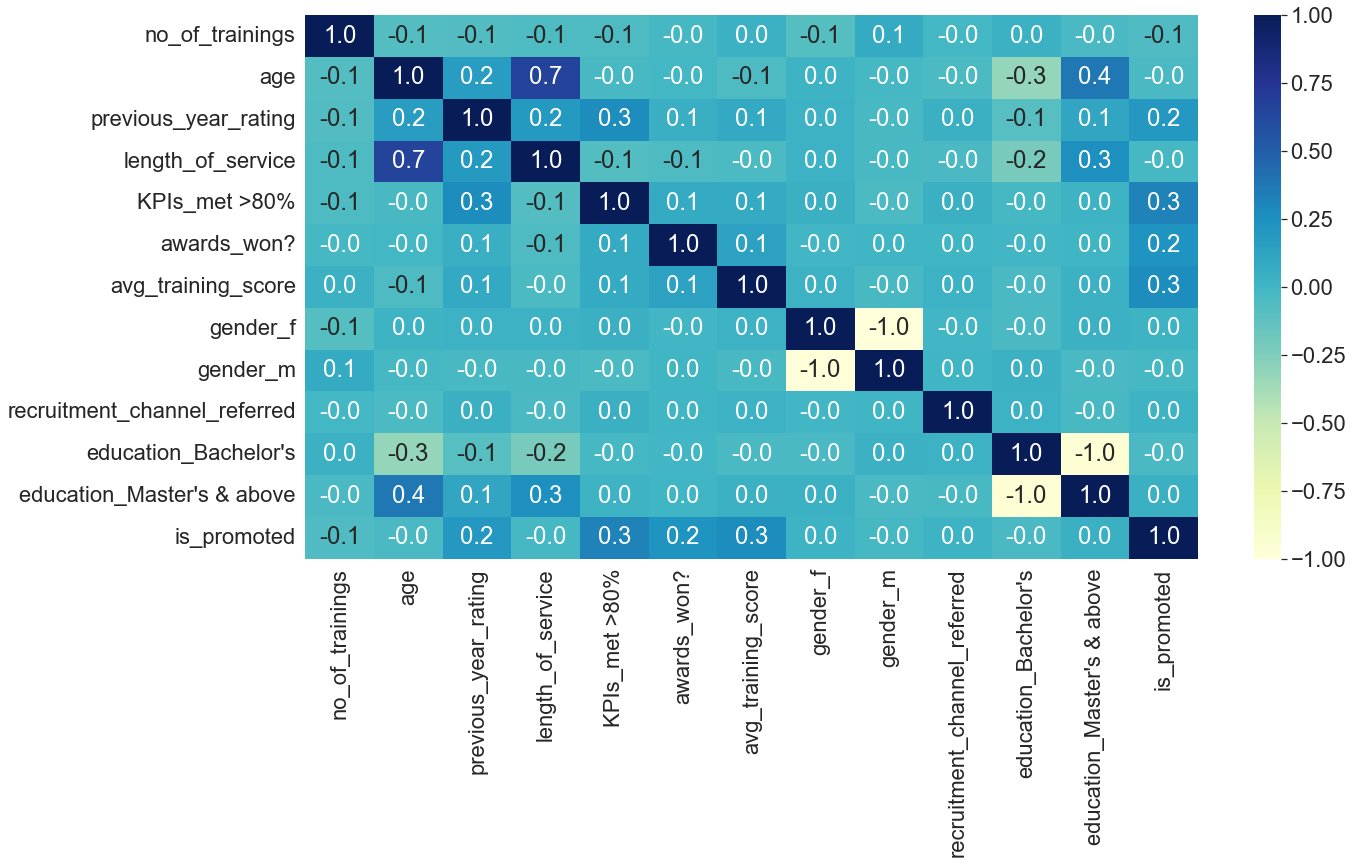

In [144]:
sns.set(font_scale=2)
corr_matrix = df_smote_20.corr()
plt.figure(figsize=(20, 10))
ax = sns.heatmap(corr_matrix,annot=True, fmt=".1f",cmap="YlGnBu") 
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))

In [145]:
# Seleccion recursiva de variables
#  selección con validación cruzada del mejor número de características

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

names=pd.DataFrame(X_train.columns)

# utilizando la regresion lineal
modelo = LinearRegression() 

# Esto es para seleccionar 5 variables: se puede cambiar y verificar en el modelo para observar su precisión
rfe_mod = RFE(modelo, step=1) # n_features_to_select = 3
myvalues=rfe_mod.fit(X_train, y_train) # predicción
myvalues.support_# caracteristicas seleccionadas
myvalues.ranking_ # a las mejores estimadas se les asigna el ranking = 1

Var_ranking = {"Variables": list(X_train.columns), "Ranking": list(myvalues.ranking_)}
Var_ranking
rankings= pd.DataFrame(Var_ranking) 
rankings

,Variables,Ranking
0,no_of_trainings,1
1,age,3
2,previous_year_rating,2
3,length_of_service,4
4,KPIs_met >80%,1
5,awards_won?,1
6,avg_training_score,1
7,gender_f,1
8,gender_m,1
9,recruitment_channel_referred,7


In [146]:
X_train_reducido = X_train[['no_of_trainings','KPIs_met >80%','previous_year_rating','awards_won?','avg_training_score']]

In [147]:
X_train_reducido

,no_of_trainings,KPIs_met >80%,previous_year_rating,awards_won?,avg_training_score
0,0.000000,0.0,0.600000,0.0,0.716667
1,0.111111,0.0,0.000000,0.0,0.716667
2,0.000000,0.0,0.800000,0.0,0.133333
3,0.000000,0.0,0.200000,0.0,0.333333
4,0.000000,0.0,1.000000,0.0,0.716667
...,...,...,...,...,...
52140,0.000000,1.0,0.600000,0.0,0.353188
52141,0.000000,0.0,0.101772,1.0,0.932447
52142,0.000000,1.0,0.738632,0.0,0.189587
52143,0.000000,0.0,0.640773,0.0,0.638430


In [148]:
y_train

0        0.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
52140    1.0
52141    1.0
52142    1.0
52143    1.0
52144    1.0
Name: is_promoted, Length: 52145, dtype: float64

#### Hemos conseguido nuestra data valanceada.

# 1) MODELO MULTIPLE REDUCIDO

In [150]:
# Modelo multiple reducido
import statsmodels.api as sm
X_train_m = sm.add_constant(X_train[['no_of_trainings','KPIs_met >80%','previous_year_rating','awards_won?','avg_training_score']], prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train_m,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.434843
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            is_promoted   No. Observations:                52145
Model:                          Logit   Df Residuals:                    52139
Method:                           MLE   Df Model:                            5
Date:                Tue, 01 Mar 2022   Pseudo R-squ.:                  0.1950
Time:                        23:42:07   Log-Likelihood:                -22675.
converged:                       True   LL-Null:                       -28168.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.9602      0.043    -91.453      0.000      -4.045      -3.875

#### calcular la probabilidad de que un trabajador sea promovido.

1/ (1+np.exp(-(-3.9602 - 2.6575no_of_trainings + 1.4327KPIs_met >80% + 1.0878Previous_year_rating + 1.9154awards_won? + 2.6872avg_training_score)))

In [211]:
# Probabilidad media de ser promovido de un trabajor es de 1.8 %: 
1/ (1+np.exp(-(-3.9602 - 2.6575*0 + 1.4327*0 + 1.0878*0 + 1.9154*0 + 2.6872*0)))

0.018702838992440917

In [221]:
# Como se interpreta el coeficiente de KPIs_met >80% :
(1-np.exp(1.4327))*100
# Conclusión: La probabilidad de que un trabajador sea promovido aumenta
# en 4% si el KPIs_met es mayor a 80%

-318.9996924817475

In [213]:
# Como se interpreta el coeficiente de no_of_trainings:
(1-np.exp(-2.6575))*100
# Conclusión: La probabilidad de que un trabajador sea promovido disminuye
# en 92% por cada número de entrenamiento

92.98766889305193

In [228]:
# Como se interpreta el coeficiente de previous_year_rating :
1-np.exp(1.0878)
# Conclusión: La probabilidad de que un trabajador sea promovido disminuye
# en 92% por cada número de entrenamiento

-1.9677378620712394

In [151]:
from sklearn.linear_model import LinearRegression


def calculateVIF(var_predictoras_df):
    var_pred_labels = list(var_predictoras_df.columns)
    num_var_pred = len(var_pred_labels)
    
    lr_model = LinearRegression()
    
    result = pd.DataFrame(index = ['VIF'], columns = var_pred_labels)
    result = result.fillna(0)
    
    for ite in range(num_var_pred):
        x_features = var_pred_labels[:]
        y_feature = var_pred_labels[ite]
        x_features.remove(y_feature)
        
        x = var_predictoras_df[x_features]
        y = var_predictoras_df[y_feature]
        
        lr_model.fit(var_predictoras_df[x_features], var_predictoras_df[y_feature])
        
        result[y_feature] = 1/(1 - lr_model.score(var_predictoras_df[x_features], var_predictoras_df[y_feature]))
    
    return result

In [152]:
calculateVIF(X_train[['no_of_trainings','KPIs_met >80%','previous_year_rating','awards_won?',
                      'avg_training_score']]).T

,VIF
no_of_trainings,1.008630
KPIs_met >80%,1.088039
previous_year_rating,1.088468
awards_won?,1.027498
avg_training_score,1.033292


#### OBS: El efecto de multicolinealidad es casi nulo, pues el VIF esta cercano a 1

In [229]:
pred_train_proba=modelo.predict(sm.add_constant(X_train[['no_of_trainings','KPIs_met >80%','previous_year_rating','awards_won?',
                      'avg_training_score']]))
pred_test_proba=modelo.predict(sm.add_constant(X_test[['no_of_trainings','KPIs_met >80%','previous_year_rating','awards_won?',
                      'avg_training_score']]))

In [230]:
# Clasificación predicha
class_train = np.where(pred_train_proba<pred_train_proba.mean(), 0, 1)
class_test = np.where(pred_test_proba<pred_test_proba.mean(), 0, 1)

In [241]:
pred_train_proba.mean()

0.23076037971041818

#### Este 23% es nuestro umbral, con la data valanceada.

In [242]:
pred_test_proba.mean()

0.1993864625289617

In [231]:
# Paso N°03: Revisamos las metricas de validacion técnicas adecuadas!
from sklearn import metrics as metrics

def metricas_confusion(y_train,y_pred_train,y_test,y_pred_test):
    # Matriz de confusion
    print("Matriz confusion: Train")
    cm_train = metrics.confusion_matrix(y_train,y_pred_train)
    print(cm_train)

    print("Matriz confusion: Test")
    cm_test = metrics.confusion_matrix(y_test,y_pred_test)
    print(cm_test)

    # Accuracy
    print("Accuracy: Train")
    accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
    print(accuracy_train)

    print("Accuracy: Test")
    accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
    print(accuracy_test)

    # Precision o Aporte del Modelo
    print("Precision: Train")
    precision_train=metrics.precision_score(y_train,y_pred_train)
    print(precision_train)

    print("Precision: Test")
    precision_test=metrics.precision_score(y_test,y_pred_test)
    print(precision_test)

    # Recall o Sensibilidad 
    print("Recall: Train")
    recall_train=metrics.recall_score(y_train,y_pred_train)
    print(recall_train)

    print("Recall: Test")
    recall_test=metrics.recall_score(y_test,y_pred_test)
    print(recall_test)

In [232]:
metricas_confusion(y_train,class_train,y_test,class_test)

Matriz confusion: Train
[[28536 11576]
 [ 3454  8579]]
Matriz confusion: Test
[[6627 3401]
 [ 186  748]]
Accuracy: Train
0.7117652699204142
Accuracy: Test
0.6727786900200693
Precision: Train
0.42565120317539074
Precision: Test
0.18028440588093517
Recall: Train
0.7129560375633675
Recall: Test
0.8008565310492506


-El nivel de sensibilidad(Recall) del entrenamiento es muy similar a la presicion del entrenamiento.
-La sensibilidad es el poder que tiene el modelo de predecir correctamente a la categoria positiva.
-El modelo aprende correctamente porque tiene una sensibilidad es mayor al 50%

In [157]:
from sklearn.metrics import classification_report

print(metrics.classification_report(y_test, class_test))

              precision    recall  f1-score   support

         0.0       0.97      0.66      0.79     10028
         1.0       0.18      0.80      0.29       934

    accuracy                           0.67     10962
   macro avg       0.58      0.73      0.54     10962
weighted avg       0.91      0.67      0.75     10962



In [158]:
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(y, y_proba, label = ''):
    '''
    dibujar la curva roc para las probabilidades y target entregados
    
    params:
    y: etiquetas originales
    y_proba: probabilidades resultado del modelo
    '''
    
    auc_roc = roc_auc_score(y, y_proba)
    fpr, tpr, thresholds = roc_curve(y, y_proba)
    
    plt.figure(figsize=(8,6))
    plt.rcParams.update({'font.size': 12})
    plt.plot(fpr, fpr, c = 'red')
    plt.plot(fpr, tpr, label= (f"Curva ROC {label} (AUC = {auc_roc:.4f})"))
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title(f"Curva ROC {label}")
    plt.legend(loc=4, numpoints=1)

In [159]:
# ROC AUC
roc_auc_score(y_test, class_test)

0.7308530760551397

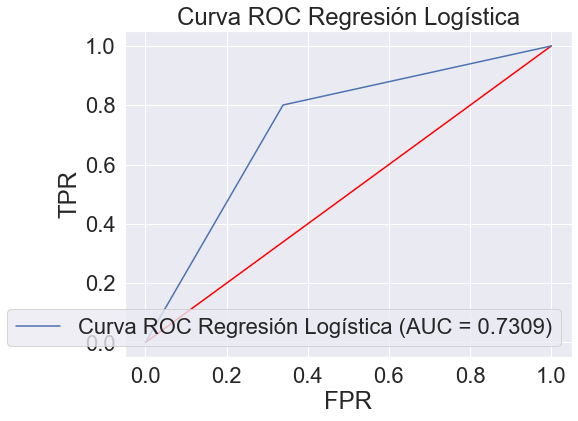

In [160]:
# Gráfica Curva ROC
plot_roc_curve(y_test, class_test, 'Regresión Logística')

Nuestra curva de regresión logistica es mayor a 70% entonces el modelo está aprendiendo, no aprende cuando la curva azul esta sobrepuesta sobre la roja.

# 2)  MODELO Analisis Discriminante

In [237]:
# Análisis discriminante lineal y cuadrático
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA

lda = LDA()#priors=[1,1]
model_lda = lda.fit(X_train, y_train)

qda = QDA()
model_qda = qda.fit(X_train, y_train)

In [238]:
model_lda.priors_

array([0.76923962, 0.23076038])

In [239]:
# Predecimos! LDA
Y_pred_train = lda.predict(X_train) # realizando la predicción
Y_pred_test  = lda.predict(X_test) # realizando la predicción

Y_proba_test= lda.predict_proba(X_test)[:,1]   #Prediccion de probabilidades del target

In [240]:
#Cálculo de los indicadores mas relevantes!
metricas_confusion(y_train,Y_pred_train,y_test,Y_pred_test)

Matriz confusion: Train
[[37307  2805]
 [ 8296  3737]]
Matriz confusion: Test
[[9381  647]
 [ 655  279]]
Accuracy: Train
0.7871128583756832
Accuracy: Test
0.8812260536398467
Precision: Train
0.571232039131764
Precision: Test
0.30129589632829373
Recall: Train
0.310562619463143
Recall: Test
0.2987152034261242


### Descartamos el modelo de analisis discriminante:
- Al momento de entrenar tenemos un nivel de sencibilidad es de 31%, lo cual es menor al 50% requerido.
- El Accuracy y el Recall estan totalmente distintos por lo que no es un buen modelo.

Por ende seguimos buscando un mejor modelo.

In [165]:
print(metrics.classification_report(y_test, Y_pred_test))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94     10028
         1.0       0.30      0.30      0.30       934

    accuracy                           0.88     10962
   macro avg       0.62      0.62      0.62     10962
weighted avg       0.88      0.88      0.88     10962



In [166]:
# ROC AUC
roc_auc_score(y_test, Y_proba_test)

0.7996145055087724

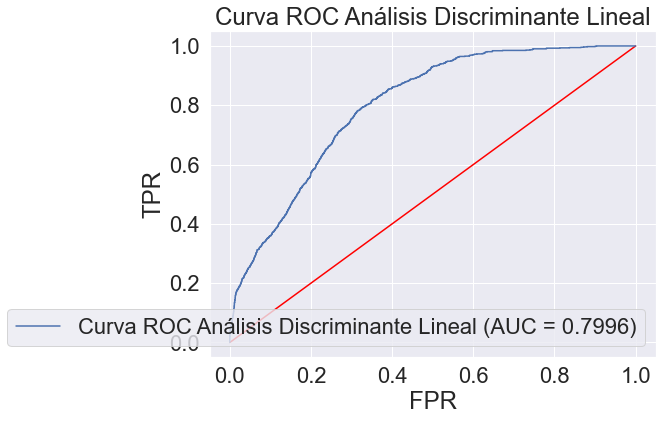

In [167]:
# Gráfica Curva ROC
plot_roc_curve(y_test, Y_proba_test, 'Análisis Discriminante Lineal')

In [168]:
# Predecimos! QDA
Y_pred_train = qda.predict(X_train) # realizando la predicción
Y_pred_test  = qda.predict(X_test) # realizando la predicción

Y_proba_test= qda.predict_proba(X_test)[:,1]   #Prediccion de probabilidades del target

In [169]:
#Cálculo de los indicadores mas relevantes!
metricas_confusion(y_train,Y_pred_train,y_test,Y_pred_test)

Matriz confusion: Train
[[34538  5574]
 [ 6549  5484]]
Matriz confusion: Test
[[8696 1332]
 [ 515  419]]
Accuracy: Train
0.7675136638220347
Accuracy: Test
0.831508848750228
Precision: Train
0.49593054801953335
Precision: Test
0.23929183323814962
Recall: Train
0.45574669658439293
Recall: Test
0.4486081370449679


In [170]:
print(metrics.classification_report(y_test, Y_pred_test))

              precision    recall  f1-score   support

         0.0       0.94      0.87      0.90     10028
         1.0       0.24      0.45      0.31       934

    accuracy                           0.83     10962
   macro avg       0.59      0.66      0.61     10962
weighted avg       0.88      0.83      0.85     10962



In [171]:
# ROC AUC
roc_auc_score(y_test, Y_proba_test)

0.770111567696104

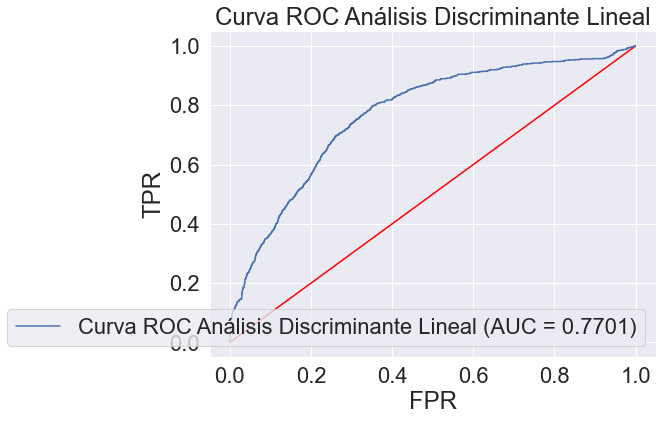

In [172]:
# Gráfica Curva ROC
plot_roc_curve(y_test, Y_proba_test, 'Análisis Discriminante Lineal')

# 3) MODELO DE ARBOL DE CLASIFICACIÓN

In [173]:
# Arbol de Clasificacion CART (Experto)  # creo otro arbol de 3 niveles
from sklearn.tree import DecisionTreeClassifier
tree_expert = DecisionTreeClassifier(
                       ccp_alpha=0.0, 
                       class_weight=None, 
                       criterion='gini',
                       max_depth=3,         # Profundidad del arbol (4)
                       max_features=6,     # Numero maximo de variables
                       max_leaf_nodes=None, # Numero de nodos
                       min_samples_leaf=20, #reduzco la cantidad de nodos hijos y en los terminales
                       min_samples_split=40,
                       min_weight_fraction_leaf=0.0, 
                       random_state=None, 
                       splitter='best')

In [176]:
# Entrenamos!
from sklearn.tree import plot_tree
tree_expert = tree_expert.fit(X_train,y_train) # ajustando el modelo a mis datos

### Visualizando el arbol

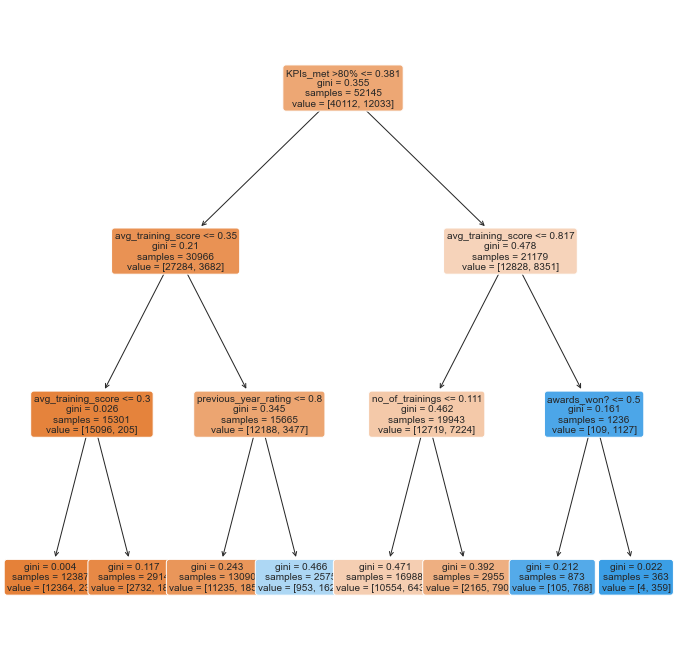

In [177]:
plt.figure(figsize=(12,12))
_ = plot_tree(tree_expert, fontsize= 10, feature_names = X_train.columns, rounded = True, filled = True)
plt.show()

Los arboles de clasificacion con cada particion miden la pureza.
mientras mas puro el nodo, el gini es mas cercano a cero.

In [178]:
# Predecimos!
Y_pred_train = tree_expert.predict(X_train) # realizando la predicción
Y_pred_test  = tree_expert.predict(X_test) # realizando la predicción

Y_proba_test= tree_expert.predict_proba(X_test)[:,1]   #Prediccion de probabilidades del target

In [179]:
#Cálculo de los indicadores mas relevantes!
metricas_confusion(y_train,Y_pred_train,y_test,Y_pred_test)

Matriz confusion: Train
[[39050  1062]
 [ 9284  2749]]
Matriz confusion: Test
[[9744  284]
 [ 746  188]]
Accuracy: Train
0.8015917154089558
Accuracy: Test
0.9060390439700785
Precision: Train
0.7213329834689058
Precision: Test
0.3983050847457627
Recall: Train
0.22845508185822322
Recall: Test
0.2012847965738758


In [180]:
print(metrics.classification_report(y_test, Y_pred_test))

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95     10028
         1.0       0.40      0.20      0.27       934

    accuracy                           0.91     10962
   macro avg       0.66      0.59      0.61     10962
weighted avg       0.88      0.91      0.89     10962



In [181]:
# ROC AUC
roc_auc_score(y_test, Y_proba_test)

0.7959142132222496

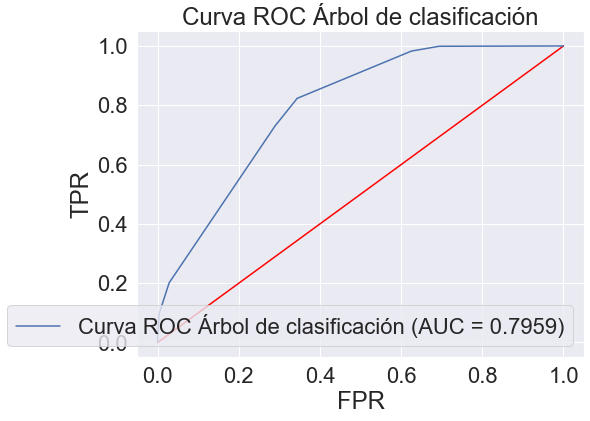

In [182]:
# Gráfica Curva ROC
plot_roc_curve(y_test, Y_proba_test, 'Árbol de clasificación')

### Descartamos el modelo de arbol de desición:

Al momento de entrenar tenemos un nivel de sensibilidad es de 22%, lo cual es inferior al 50% minimo requerido.
El Accuracy y el Recall estan totalmente distintos por lo que no es un buen modelo.
Por ende seguimos buscando un mejor modelo.

# 4) MODELO KNN

In [183]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   #se recomienda reescalar la base antes de usar esta técnica
scaler.fit(X_train)

X_train_ss = scaler.transform(X_train)
X_test_ss = scaler.transform(X_test)

In [184]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_ss, y_train)

KNeighborsClassifier(n_neighbors=10)

In [185]:
# Predecimos!
Y_pred_train = knn.predict(X_train_ss) # realizando la predicción
Y_pred_test  = knn.predict(X_test_ss) # realizando la predicción

Y_proba_test= knn.predict_proba(X_test_ss)[:,1]   #Prediccion de probabilidades del target

In [186]:
#Cálculo de los indicadores mas relevantes!
metricas_confusion(y_train,Y_pred_train,y_test,Y_pred_test)

Matriz confusion: Train
[[37851  2261]
 [ 4116  7917]]
Matriz confusion: Test
[[9308  720]
 [ 632  302]]
Accuracy: Train
0.8777063956275769
Accuracy: Test
0.8766648421820835
Precision: Train
0.7778541953232462
Precision: Test
0.29549902152641877
Recall: Train
0.6579406631762653
Recall: Test
0.3233404710920771


In [187]:
print(metrics.classification_report(y_test, Y_pred_test))

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93     10028
         1.0       0.30      0.32      0.31       934

    accuracy                           0.88     10962
   macro avg       0.62      0.63      0.62     10962
weighted avg       0.88      0.88      0.88     10962



In [188]:
# ROC AUC
roc_auc_score(y_test, Y_proba_test)

0.7645068113351139

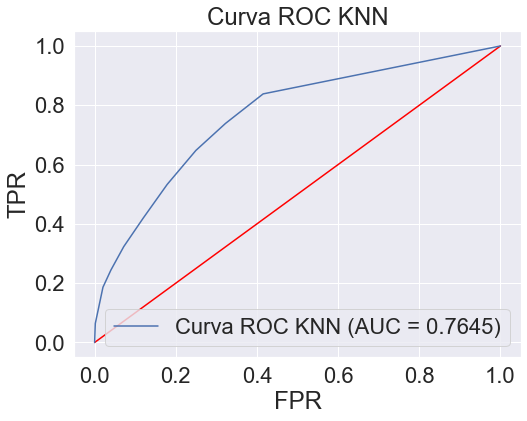

In [189]:
# Gráfica Curva ROC
plot_roc_curve(y_test, Y_proba_test, 'KNN')

### Descartamos el Modelo de KNN:
Al momento de entrenar tenemos un nivel de sensibilidad es de 65%, pero el nivel de sensibilidad del test es muy distinto.

El Accuracy y el Recall estan bastante separados por lo que se puede tomar en cuenta, siempre y cuando no se consiga un mejor modelo. Por ende seguimos buscando un mejor modelo.

### Descartamos el MODELO SVM por su alto costo computacional.

# 5) MODELOS EMSAMBLADOS

## 5.1) MODELO Max Voting

In [248]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

In [192]:
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

pred1=model1.predict(X_test)
pred2=model2.predict(X_test)
pred3=model3.predict(X_test)

In [193]:
from statistics import mode
final_pred = np.array([])
for i in range(0,len(X_test)):
    final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i]]))

In [194]:
#Cálculo de los indicadores mas relevantes!
print(metrics.classification_report(y_test, final_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94     10028
         1.0       0.33      0.29      0.31       934

    accuracy                           0.89     10962
   macro avg       0.63      0.62      0.62     10962
weighted avg       0.88      0.89      0.89     10962



## 5.2) MODELO averaging

In [195]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

In [196]:
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

LogisticRegression()

In [197]:
pred1=model1.predict_proba(X_test)
pred2=model2.predict_proba(X_test)
pred3=model3.predict_proba(X_test)

In [198]:
finalpred=(pred1+pred2+pred3)/3

In [199]:
#Cálculo de los indicadores mas relevantes!
print(metrics.classification_report(y_test, final_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94     10028
         1.0       0.33      0.29      0.31       934

    accuracy                           0.89     10962
   macro avg       0.63      0.62      0.62     10962
weighted avg       0.88      0.89      0.89     10962



## 5.3) MODELO Weighted Average

In [200]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

pred1=model1.predict_proba(X_test)
pred2=model2.predict_proba(X_test)
pred3=model3.predict_proba(X_test)

finalpred=(pred1*0.3+pred2*0.3+pred3*0.4)

In [201]:
#Cálculo de los indicadores mas relevantes!
print(metrics.classification_report(y_test, final_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94     10028
         1.0       0.33      0.29      0.31       934

    accuracy                           0.89     10962
   macro avg       0.63      0.62      0.62     10962
weighted avg       0.88      0.89      0.89     10962



## 6) BAGGING

In [202]:
## Modelos Supervisados : Random Forest ##
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500,
                            max_features= 6,
                            max_depth=4) # Numero de obs por nodo hoja
rf.fit(X_train, y_train) # Entrenando un algoritmo

RandomForestClassifier(max_depth=4, max_features=6, n_estimators=500)

In [203]:
# Predecir con el algoritmo entrenado para validar
y_pred_train=rf.predict(X_train) # Prediccion sobre el train
y_pred_test= rf.predict(X_test) # Prediccion sobre el test

In [204]:
#Cálculo de los indicadores mas relevantes!
metricas_confusion(y_train,y_pred_train,y_test,y_pred_test)

Matriz confusion: Train
[[39852   260]
 [ 9714  2319]]
Matriz confusion: Test
[[9945   83]
 [ 766  168]]
Accuracy: Train
0.8087256688081311
Accuracy: Test
0.9225506294471811
Precision: Train
0.899185730903451
Precision: Test
0.6693227091633466
Recall: Train
0.19272001994515084
Recall: Test
0.17987152034261242


## 7) BOOSTING

### AdaBoost

In [205]:
## Modelos Supervisados : AdaBoost ##
from sklearn.ensemble import AdaBoostClassifier  # Paso01: Instancio
AdaBoost=AdaBoostClassifier(learning_rate=0.001, 
                            n_estimators=250) # Paso02: Especifico
AdaBoost.fit(X_train, y_train)                   # Paso03: Entrenamiento algoritmo

AdaBoostClassifier(learning_rate=0.001, n_estimators=250)

In [206]:
# Predecir con el algoritmo entrenado para validar
y_pred_train=AdaBoost.predict(X_train)
y_pred_test= AdaBoost.predict(X_test)

In [207]:
#Cálculo de los indicadores mas relevantes!
metricas_confusion(y_train,y_pred_train,y_test,y_pred_test)

Matriz confusion: Train
[[40003   109]
 [10906  1127]]
Matriz confusion: Test
[[9991   37]
 [ 843   91]]
Accuracy: Train
0.7887621056668904
Accuracy: Test
0.919722678343368
Precision: Train
0.9118122977346278
Precision: Test
0.7109375
Recall: Train
0.09365910413030831
Recall: Test
0.0974304068522484


## Las intepretaciones y conclusiones estaran en el ppt y la presentacion final